In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=37395d82e7b18daedf970aeddca2dfa47c3339d9d3ff61be9e6aadab7ad72744
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark
spark = SparkSession.builder.appName("Optimized Parquet Conversion").getOrCreate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
csv_path = '/content/drive/MyDrive/Big_Data'

In [ ]:
df1 = spark.read.csv("/content/drive/MyDrive/Big_Data/2016Q1.csv",sep='|', header=True, inferSchema=True)
df2 = spark.read.csv("/content/drive/MyDrive/Big_Data/2016Q2.csv",sep='|', header=True, inferSchema=True)

df3 = spark.read.csv("/content/drive/MyDrive/Big_Data/2016Q3.csv",sep='|', header=True, inferSchema=True)

df4 = spark.read.csv("/content/drive/MyDrive/Big_Data/2016Q4.csv",sep='|', header=True, inferSchema=True)

df5 = spark.read.csv("/content/drive/MyDrive/Big_Data/2017Q1.csv",sep='|', header=True, inferSchema=True)

df6 = spark.read.csv("/content/drive/MyDrive/Big_Data/2017Q2.csv",sep='|', header=True, inferSchema=True)

df7 = spark.read.csv("/content/drive/MyDrive/Big_Data/2017Q3.csv",sep='|', header=True, inferSchema=True)

df8 = spark.read.csv("/content/drive/MyDrive/Big_Data/2017Q4.csv",sep='|', header=True, inferSchema=True)




In [ ]:
df1.show()

+----+------------+-------+---+----------------------------------+-----+----+------+------+--------+----+--------+---+------+--------+---+-----+-----+------+----+----+---+---+---+----+---+---+---+---+---+---+-----+---+----+---+---+---+----+----+---+----+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+---+----+----+----+----+---+----+---+----+----+----+----+----+---+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+-----+----+-----+-----+-----+-----+-----+----+-----+
| _c0|100000512540|0220162| C3|Franklin American Mortgage Company|Other| _c6|3.7507|3.7508|65000.00|_c10|    0.00|360|122015|02201614|115|35916|35917|012046|7419|7420|121| 31|814|_c24|N25|C26| SF|128|  P| GA|12260|308|_c33|FRM|N35|N36|_c37|_c38| 00|_c40|N41|_c42|_c43|_c44|_c45|_c46|_c47|_c48|_c49|_c50|_c51|_c52|_c53|_c54|_c55|_c56|_c57|_c58|_c59|_c60|_c61|_c62|_c63|_c64|_c65|_c66|_c67|_c68|_c69

In [ ]:
# Convert each DataFrame to Parquet and save it individually
df1.write.parquet("/content/drive/MyDrive/Big_Data/parquet/2016Q1.parquet")
df2.write.parquet("/content/drive/MyDrive/Big_Data/parquet/2016Q2.parquet")
df3.write.parquet("/content/drive/MyDrive/Big_Data/parquet/2016Q3.parquet")
df4.write.parquet("/content/drive/MyDrive/Big_Data/parquet/2016Q4.parquet")

df5.write.parquet("/content/drive/MyDrive/Big_Data/parquet/2017Q1.parquet")
df6.write.parquet("/content/drive/MyDrive/Big_Data/parquet/2017Q2.parquet")
df7.write.parquet("/content/drive/MyDrive/Big_Data/parquet/2017Q3.parquet")
df8.write.parquet("/content/drive/MyDrive/Big_Data/parquet/2017Q4.parquet")


In [ ]:
# Read the Parquet files for 2016
df_2016Q1 = spark.read.parquet("/content/drive/MyDrive/Big_Data/parquet/2016Q1.parquet")
df_2016Q2 = spark.read.parquet("/content/drive/MyDrive/Big_Data/parquet/2016Q2.parquet")
df_2016Q3 = spark.read.parquet("/content/drive/MyDrive/Big_Data/parquet/2016Q3.parquet")
df_2016Q4 = spark.read.parquet("/content/drive/MyDrive/Big_Data/parquet/2016Q4.parquet")

# Read the Parquet files for 2017
df_2017Q1 = spark.read.parquet("/content/drive/MyDrive/Big_Data/parquet/2017Q1.parquet")
df_2017Q2 = spark.read.parquet("/content/drive/MyDrive/Big_Data/parquet/2017Q2.parquet")
df_2017Q3 = spark.read.parquet("/content/drive/MyDrive/Big_Data/parquet/2017Q3.parquet")
df_2017Q4 = spark.read.parquet("/content/drive/MyDrive/Big_Data/parquet/2017Q4.parquet")

# Inspect the schema for all 2016 Parquet files
df_2016Q1.printSchema()  # View the schema for 2016 Q1
df_2016Q2.printSchema()  # View the schema for 2016 Q2
df_2016Q3.printSchema()  # View the schema for 2016 Q3
df_2016Q4.printSchema()  # View the schema for 2016 Q4

# Inspect the schema for all 2017 Parquet files
df_2017Q1.printSchema()  # View the schema for 2017 Q1
df_2017Q2.printSchema()  # View the schema for 2017 Q2
df_2017Q3.printSchema()  # View the schema for 2017 Q3
df_2017Q4.printSchema()  # View the schema for 2017 Q4

# Show the first 5 rows of data for 2016 and 2017 files
df_2016Q1.show(5)  # Show top 5 rows of 2016 Q1 data
df_2016Q2.show(5)  # Show top 5 rows of 2016 Q2 data
df_2016Q3.show(5)  # Show top 5 rows of 2016 Q3 data
df_2016Q4.show(5)  # Show top 5 rows of 2016 Q4 data

df_2017Q1.show(5)  # Show top 5 rows of 2017 Q1 data
df_2017Q2.show(5)  # Show top 5 rows of 2017 Q2 data
df_2017Q3.show(5)  # Show top 5 rows of 2017 Q3 data
df_2017Q4.show(5)  # Show top 5 rows of 2017 Q4 data


root
 |-- _c0: string (nullable = true)
 |-- 100000512540: long (nullable = true)
 |-- 0220162: integer (nullable = true)
 |-- C3: string (nullable = true)
 |-- Franklin American Mortgage Company: string (nullable = true)
 |-- Other: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- 3.7507: double (nullable = true)
 |-- 3.7508: double (nullable = true)
 |-- 65000.00: double (nullable = true)
 |-- _c10: string (nullable = true)
 |-- 0.00: double (nullable = true)
 |-- 360: integer (nullable = true)
 |-- 122015: integer (nullable = true)
 |-- 02201614: integer (nullable = true)
 |-- 115: integer (nullable = true)
 |-- 35916: integer (nullable = true)
 |-- 35917: integer (nullable = true)
 |-- 012046: integer (nullable = true)
 |-- 7419: integer (nullable = true)
 |-- 7420: integer (nullable = true)
 |-- 121: integer (nullable = true)
 |-- 31: integer (nullable = true)
 |-- 814: integer (nullable = true)
 |-- _c24: integer (nullable = true)
 |-- N25: string (nullable = true

In [ ]:
import re
from pyspark.sql import functions as F

# Function to sanitize column names by replacing special characters
def sanitize_column_names(df):
    for col in df.columns:
        new_col_name = re.sub(r'[^a-zA-Z0-9]', '_', col)  # Replace special characters with underscores
        df = df.withColumnRenamed(col, new_col_name)
    return df

# Function to add missing columns (with no null values for existing columns)
def add_missing_columns(df, all_columns):
    for col in all_columns:
        if col not in df.columns:
            df = df.withColumn(col, F.lit(None))  # Add missing columns as null values
    return df

# Function to ensure DataFrames have the same column order
def align_dataframes(dataframes):
    all_columns = set()

    # Collect all columns from each DataFrame
    for df in dataframes:
        all_columns.update(df.columns)

    # Ensure each DataFrame has the same columns and order
    aligned_dfs = [add_missing_columns(df, all_columns) for df in dataframes]
    aligned_dfs = [df.select(*sorted(all_columns)) for df in aligned_dfs]  # Sort columns alphabetically for consistency

    return aligned_dfs

# Function to rename columns according to a mapping
def rename_columns(df, column_mapping):
    for old_col, new_col in column_mapping.items():
        if old_col in df.columns:
            df = df.withColumnRenamed(old_col, new_col)
    return df

# Define your column mapping (assuming the same pattern for _cX columns)
column_mapping = {
    0: 'Reference Pool ID',
    1: 'Loan Identifier',
    2: 'Monthly Reporting Period',
    3: 'Channel',
    4: 'Seller Name',
    5: 'Servicer Name',
    6: 'Master Servicer',
    7: 'Original Interest Rate',
    8: 'Current Interest Rate',
    9: 'Original UPB',
    10: 'UPB at Issuance',
    11: 'Current Actual UPB',
    12: 'Original Loan Term',
    13: 'Origination Date',
    14: 'First Payment Date',
    15: 'Loan Age',
    16: 'Remaining Months to Legal Maturity',
    17: 'Remaining Months To Maturity',
    18: 'Maturity Date',
    19: 'Original Loan to Value Ratio (LTV)',
    20: 'Original Combined Loan to Value Ratio (CLTV)',
    21: 'Number of Borrowers',
    22: 'Debt-To-Income (DTI)',
    23: 'Borrower Credit Score at Origination',
    24: 'Co-Borrower Credit Score at Origination',
    25: 'First Time Home Buyer Indicator',
    26: 'Loan Purpose',
    27: 'Property Type',
    28: 'Number of Units',
    29: 'Occupancy Status',
    30: 'Property State',
    31: 'Metropolitan Statistical Area (MSA)',
    32: 'Zip Code Short',
    33: 'Mortgage Insurance Percentage',
    34: 'Amortization Type',
    35: 'Prepayment Penalty Indicator',
    36: 'Interest Only Loan Indicator',
    37: 'Interest Only First Principal And Interest Payment Date',
    38: 'Months to Amortization',
    39: 'Current Loan Delinquency Status',
    40: 'Loan Payment History',
    41: 'Modification Flag',
    42: 'Mortgage Insurance Cancellation Indicator',
    43: 'Zero Balance Code',
    44: 'Zero Balance Effective Date',
    45: 'UPB at the Time of Removal',
    46: 'Repurchase Date',
    47: 'Scheduled Principal Current',
    48: 'Total Principal Current',
    49: 'Unscheduled Principal Current',
    50: 'Last Paid Installment Date',
    51: 'Foreclosure Date',
    52: 'Disposition Date',
    53: 'Foreclosure Costs',
    54: 'Property Preservation and Repair Costs',
    55: 'Asset Recovery Costs',
    56: 'Miscellaneous Holding Expenses and Credits',
    57: 'Associated Taxes for Holding Property',
    58: 'Net Sales Proceeds',
    59: 'Credit Enhancement Proceeds',
    60: 'Repurchase Make Whole Proceeds',
    61: 'Other Foreclosure Proceeds',
    62: 'Modification-Related Non-Interest Bearing UPB',
    63: 'Principal Forgiveness Amount',
    64: 'Original List Start Date',
    65: 'Original List Price',
    66: 'Current List Start Date',
    67: 'Current List Price',
    68: 'Borrower Credit Score At Issuance',
    69: 'Co-Borrower Credit Score At Issuance',
    70: 'Borrower Credit Score Current',
    71: 'Co-Borrower Credit Score Current',
    72: 'Mortgage Insurance Type',
    73: 'Servicing Activity Indicator',
    74: 'Current Period Modification Loss Amount',
    75: 'Cumulative Modification Loss Amount',
    76: 'Current Period Credit Event Net Gain or Loss',
    77: 'Cumulative Credit Event Net Gain or Loss',
    78: 'Special Eligibility Program',
    79: 'Foreclosure Principal Write-off Amount',
    80: 'Relocation Mortgage Indicator',
    81: 'Zero Balance Code Change Date',
    82: 'Loan Holdback Indicator',
    83: 'Loan Holdback Effective Date',
    84: 'Delinquent Accrued Interest',
    85: 'Property Valuation Method',
    86: 'High Balance Loan Indicator',
    87: 'ARM Initial Fixed-Rate Period ≤ 5 YR Indicator',
    88: 'ARM Product Type',
    89: 'Initial Fixed-Rate Period',
    90: 'Interest Rate Adjustment Frequency',
    91: 'Next Interest Rate Adjustment Date',
    92: 'Next Payment Change Date',
    93: 'Index',
    94: 'ARM Cap Structure',
    95: 'Initial Interest Rate Cap Up Percent',
    96: 'Periodic Interest Rate Cap Up Percent',
    97: 'Lifetime Interest Rate Cap Up Percent',
    98: 'Mortgage Margin',
    99: 'ARM Balloon Indicator',
    100: 'ARM Plan Number',
    101: 'Borrower Assistance Plan',
    102: 'High Loan to Value (HLTV) Refinance Option Indicator',
    103: 'Deal Name',
    104: 'Repurchase Make Whole Proceed',
    105: 'Alternative Delinquency Resolution',
    106: 'Alternative Delinquency Resolution Count',
    107: 'Total Deferral Amount',
    108: 'Payment Deferral Modification Event Indicator',
    109: 'Interest Bearing UPB'
}
# List of 2016 DataFrames
dataframes_2016 = [df_2016Q1, df_2016Q2, df_2016Q3, df_2016Q4]

# List of 2017 DataFrames
dataframes_2017 = [df_2017Q1, df_2017Q2, df_2017Q3, df_2017Q4]

# Sanitize the column names for 2016 and 2017 DataFrames
dataframes_2016 = [sanitize_column_names(df) for df in dataframes_2016]
dataframes_2017 = [sanitize_column_names(df) for df in dataframes_2017]

# Align DataFrames for 2016
aligned_2016 = align_dataframes(dataframes_2016)

# Combine the aligned DataFrames into a single DataFrame for 2016
df_2016_combined = aligned_2016[0]
for df in aligned_2016[1:]:
    df_2016_combined = df_2016_combined.unionByName(df)

# Align DataFrames for 2017
aligned_2017 = align_dataframes(dataframes_2017)

# Combine the aligned DataFrames into a single DataFrame for 2017
df_2017_combined = aligned_2017[0]
for df in aligned_2017[1:]:
    df_2017_combined = df_2017_combined.unionByName(df)

# Rename columns based on the provided mapping for 2016
df_2016_combined = rename_columns(df_2016_combined, column_mapping)

# Rename columns based on the provided mapping for 2017
df_2017_combined = rename_columns(df_2017_combined, column_mapping)

# Verify the final schema and data for 2016
df_2016_combined.printSchema()
df_2016_combined.show(5)

# Verify the final schema and data for 2017
df_2017_combined.printSchema()
df_2017_combined.show(5)

root
 |-- 0: integer (nullable = true)
 |-- 00: string (nullable = true)
 |-- 00000: integer (nullable = true)
 |-- 012017: integer (nullable = true)
 |-- 012046: integer (nullable = true)
 |-- 02201614: integer (nullable = true)
 |-- 0220162: integer (nullable = true)
 |-- 032016: integer (nullable = true)
 |-- 042016: integer (nullable = true)
 |-- 042046: integer (nullable = true)
 |-- 052016: integer (nullable = true)
 |-- 062016: integer (nullable = true)
 |-- 072016: integer (nullable = true)
 |-- 072046: integer (nullable = true)
 |-- 082016: integer (nullable = true)
 |-- 0_00: double (nullable = true)
 |-- 1: integer (nullable = true)
 |-- 100000040778: long (nullable = true)
 |-- 100000512540: long (nullable = true)
 |-- 100000827160: long (nullable = true)
 |-- 100001420754: long (nullable = true)
 |-- 112016: integer (nullable = true)
 |-- 115: integer (nullable = true)
 |-- 121: integer (nullable = true)
 |-- 122015: integer (nullable = true)
 |-- 122016: integer (nullable

In [ ]:
from pyspark.sql import functions as F

# Define the column position mapping as provided
position_mapping = {
    0: 'Reference Pool ID',
    1: 'Loan Identifier',
    2: 'Monthly Reporting Period',
    3: 'Channel',
    4: 'Seller Name',
    5: 'Servicer Name',
    6: 'Master Servicer',
    7: 'Original Interest Rate',
    8: 'Current Interest Rate',
    9: 'Original UPB',
    10: 'UPB at Issuance',
    11: 'Current Actual UPB',
    12: 'Original Loan Term',
    13: 'Origination Date',
    14: 'First Payment Date',
    15: 'Loan Age',
    16: 'Remaining Months to Legal Maturity',
    17: 'Remaining Months To Maturity',
    18: 'Maturity Date',
    19: 'Original Loan to Value Ratio (LTV)',
    20: 'Original Combined Loan to Value Ratio (CLTV)',
    21: 'Number of Borrowers',
    22: 'Debt-To-Income (DTI)',
    23: 'Borrower Credit Score at Origination',
    24: 'Co-Borrower Credit Score at Origination',
    25: 'First Time Home Buyer Indicator',
    26: 'Loan Purpose',
    27: 'Property Type',
    28: 'Number of Units',
    29: 'Occupancy Status',
    30: 'Property State',
    31: 'Metropolitan Statistical Area (MSA)',
    32: 'Zip Code Short',
    33: 'Mortgage Insurance Percentage',
    34: 'Amortization Type',
    35: 'Prepayment Penalty Indicator',
    36: 'Interest Only Loan Indicator',
    37: 'Interest Only First Principal And Interest Payment Date',
    38: 'Months to Amortization',
    39: 'Current Loan Delinquency Status',
    40: 'Loan Payment History',
    41: 'Modification Flag',
    42: 'Mortgage Insurance Cancellation Indicator',
    43: 'Zero Balance Code',
    44: 'Zero Balance Effective Date',
    45: 'UPB at the Time of Removal',
    46: 'Repurchase Date',
    47: 'Scheduled Principal Current',
    48: 'Total Principal Current',
    49: 'Unscheduled Principal Current',
    50: 'Last Paid Installment Date',
    51: 'Foreclosure Date',
    52: 'Disposition Date',
    53: 'Foreclosure Costs',
    54: 'Property Preservation and Repair Costs',
    55: 'Asset Recovery Costs',
    56: 'Miscellaneous Holding Expenses and Credits',
    57: 'Associated Taxes for Holding Property',
    58: 'Net Sales Proceeds',
    59: 'Credit Enhancement Proceeds',
    60: 'Repurchase Make Whole Proceeds',
    61: 'Other Foreclosure Proceeds',
    62: 'Modification-Related Non-Interest Bearing UPB',
    63: 'Principal Forgiveness Amount',
    64: 'Original List Start Date',
    65: 'Original List Price',
    66: 'Current List Start Date',
    67: 'Current List Price',
    68: 'Borrower Credit Score At Issuance',
    69: 'Co-Borrower Credit Score At Issuance',
    70: 'Borrower Credit Score Current',
    71: 'Co-Borrower Credit Score Current',
    72: 'Mortgage Insurance Type',
    73: 'Servicing Activity Indicator',
    74: 'Current Period Modification Loss Amount',
    75: 'Cumulative Modification Loss Amount',
    76: 'Current Period Credit Event Net Gain or Loss',
    77: 'Cumulative Credit Event Net Gain or Loss',
    78: 'Special Eligibility Program',
    79: 'Foreclosure Principal Write-off Amount',
    80: 'Relocation Mortgage Indicator',
    81: 'Zero Balance Code Change Date',
    82: 'Loan Holdback Indicator',
    83: 'Loan Holdback Effective Date',
    84: 'Delinquent Accrued Interest',
    85: 'Property Valuation Method',
    86: 'High Balance Loan Indicator',
    87: 'ARM Initial Fixed-Rate Period ≤ 5 YR Indicator',
    88: 'ARM Product Type',
    89: 'Initial Fixed-Rate Period',
    90: 'Interest Rate Adjustment Frequency',
    91: 'Next Interest Rate Adjustment Date',
    92: 'Next Payment Change Date',
    93: 'Index',
    94: 'ARM Cap Structure',
    95: 'Initial Interest Rate Cap Up Percent',
    96: 'Periodic Interest Rate Cap Up Percent',
    97: 'Lifetime Interest Rate Cap Up Percent',
    98: 'Mortgage Margin',
    99: 'ARM Balloon Indicator',
    100: 'ARM Plan Number',
    101: 'Borrower Assistance Plan',
    102: 'High Loan to Value (HLTV) Refinance Option Indicator',
    103: 'Deal Name',
    104: 'Repurchase Make Whole Proceed',
    105: 'Alternative Delinquency Resolution',
    106: 'Alternative Delinquency Resolution Count',
    107: 'Total Deferral Amount',
    108: 'Payment Deferral Modification Event Indicator',
    109: 'Interest Bearing UPB'
}

# Function to rename columns based on their index
def rename_columns_by_position(df, mapping):
    current_columns = df.columns
    for index, col in enumerate(current_columns):
        if index in mapping:
            df = df.withColumnRenamed(col, mapping[index])
    return df

# Load your 2016 DataFrames
df_2016Q1 = spark.read.parquet("/content/drive/MyDrive/Big_Data/parquet/2016Q1.parquet")
df_2016Q2 = spark.read.parquet("/content/drive/MyDrive/Big_Data/parquet/2016Q2.parquet")
df_2016Q3 = spark.read.parquet("/content/drive/MyDrive/Big_Data/parquet/2016Q3.parquet")
df_2016Q4 = spark.read.parquet("/content/drive/MyDrive/Big_Data/parquet/2016Q4.parquet")

# Apply the renaming function to each dataframe
df_2016Q1 = rename_columns_by_position(df_2016Q1, position_mapping)
df_2016Q2 = rename_columns_by_position(df_2016Q2, position_mapping)
df_2016Q3 = rename_columns_by_position(df_2016Q3, position_mapping)
df_2016Q4 = rename_columns_by_position(df_2016Q4, position_mapping)

# Verify the renamed columns
df_2016Q1.printSchema()
df_2016Q2.printSchema()

# Combine DataFrames after renaming columns
df_2016_combined = df_2016Q1.unionByName(df_2016Q2).unionByName(df_2016Q3).unionByName(df_2016Q4)

# Show combined schema and few rows to verify
df_2016_combined.printSchema()
df_2016_combined.show(5)


root
 |-- Reference Pool ID: string (nullable = true)
 |-- Loan Identifier: long (nullable = true)
 |-- Monthly Reporting Period: integer (nullable = true)
 |-- Channel: string (nullable = true)
 |-- Seller Name: string (nullable = true)
 |-- Servicer Name: string (nullable = true)
 |-- Master Servicer: string (nullable = true)
 |-- Original Interest Rate: double (nullable = true)
 |-- Current Interest Rate: double (nullable = true)
 |-- Original UPB: double (nullable = true)
 |-- UPB at Issuance: string (nullable = true)
 |-- Current Actual UPB: double (nullable = true)
 |-- Original Loan Term: integer (nullable = true)
 |-- Origination Date: integer (nullable = true)
 |-- First Payment Date: integer (nullable = true)
 |-- Loan Age: integer (nullable = true)
 |-- Remaining Months to Legal Maturity: integer (nullable = true)
 |-- Remaining Months To Maturity: integer (nullable = true)
 |-- Maturity Date: integer (nullable = true)
 |-- Original Loan to Value Ratio (LTV): integer (nullab

In [ ]:
# Load your 2017 DataFrames
df_2017Q1 = spark.read.parquet("/content/drive/MyDrive/Big_Data/parquet/2017Q1.parquet")
df_2017Q2 = spark.read.parquet("/content/drive/MyDrive/Big_Data/parquet/2017Q2.parquet")
df_2017Q3 = spark.read.parquet("/content/drive/MyDrive/Big_Data/parquet/2017Q3.parquet")
df_2017Q4 = spark.read.parquet("/content/drive/MyDrive/Big_Data/parquet/2017Q4.parquet")

# Apply the renaming function to each dataframe
df_2017Q1 = rename_columns_by_position(df_2017Q1, position_mapping)
df_2017Q2 = rename_columns_by_position(df_2017Q2, position_mapping)
df_2017Q3 = rename_columns_by_position(df_2017Q3, position_mapping)
df_2017Q4 = rename_columns_by_position(df_2017Q4, position_mapping)

# Verify the renamed columns
df_2017Q1.printSchema()
df_2017Q2.printSchema()

# Combine DataFrames after renaming columns
df_2017_combined = df_2017Q1.unionByName(df_2017Q2).unionByName(df_2017Q3).unionByName(df_2017Q4)

# Show combined schema and few rows to verify
df_2017_combined.printSchema()
df_2017_combined.show(5)


root
 |-- Reference Pool ID: string (nullable = true)
 |-- Loan Identifier: long (nullable = true)
 |-- Monthly Reporting Period: integer (nullable = true)
 |-- Channel: string (nullable = true)
 |-- Seller Name: string (nullable = true)
 |-- Servicer Name: string (nullable = true)
 |-- Master Servicer: string (nullable = true)
 |-- Original Interest Rate: double (nullable = true)
 |-- Current Interest Rate: double (nullable = true)
 |-- Original UPB: double (nullable = true)
 |-- UPB at Issuance: string (nullable = true)
 |-- Current Actual UPB: double (nullable = true)
 |-- Original Loan Term: integer (nullable = true)
 |-- Origination Date: integer (nullable = true)
 |-- First Payment Date: integer (nullable = true)
 |-- Loan Age: integer (nullable = true)
 |-- Remaining Months to Legal Maturity: integer (nullable = true)
 |-- Remaining Months To Maturity: integer (nullable = true)
 |-- Maturity Date: integer (nullable = true)
 |-- Original Loan to Value Ratio (LTV): integer (nullab

###1st Question

In [ ]:
from pyspark.sql.types import DoubleType, IntegerType

# Cast relevant columns in 2016 DataFrame
df_2016_combined = df_2016_combined.withColumn("Borrower Credit Score at Origination", F.col("Borrower Credit Score at Origination").cast(IntegerType())) \
    .withColumn("Original Interest Rate", F.col("Original Interest Rate").cast(DoubleType())) \
    .withColumn("Original Loan to Value Ratio (LTV)", F.col("Original Loan to Value Ratio (LTV)").cast(DoubleType())) \
    .withColumn("Current Actual UPB", F.col("Current Actual UPB").cast(DoubleType())) \
    .withColumn("Debt-To-Income (DTI)", F.col("Debt-To-Income (DTI)").cast(DoubleType()))

# Repeat for 2017 DataFrame
df_2017_combined = df_2017_combined.withColumn("Borrower Credit Score at Origination", F.col("Borrower Credit Score at Origination").cast(IntegerType())) \
    .withColumn("Original Interest Rate", F.col("Original Interest Rate").cast(DoubleType())) \
    .withColumn("Original Loan to Value Ratio (LTV)", F.col("Original Loan to Value Ratio (LTV)").cast(DoubleType())) \
    .withColumn("Current Actual UPB", F.col("Current Actual UPB").cast(DoubleType())) \
    .withColumn("Debt-To-Income (DTI)", F.col("Debt-To-Income (DTI)").cast(DoubleType()))


In [ ]:
# Calculate average FICO score for 2016
avg_fico_2016 = df_2016_combined.filter(F.col("Borrower Credit Score at Origination").isNotNull()) \
    .agg(F.avg(F.col("Borrower Credit Score at Origination")).alias("Avg_FICO_2016"))

avg_fico_2016.show()

# Calculate average FICO score for 2017
avg_fico_2017 = df_2017_combined.filter(F.col("Borrower Credit Score at Origination").isNotNull()) \
    .agg(F.avg(F.col("Borrower Credit Score at Origination")).alias("Avg_FICO_2017"))

avg_fico_2017.show()


+-----------------+
|    Avg_FICO_2016|
+-----------------+
|757.0401385499175|
+-----------------+

+-----------------+
|    Avg_FICO_2017|
+-----------------+
|750.0405422864827|
+-----------------+



<ipython-input-22-1ec01a028608>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Avg_FICO', data=data, palette='Blues_d')


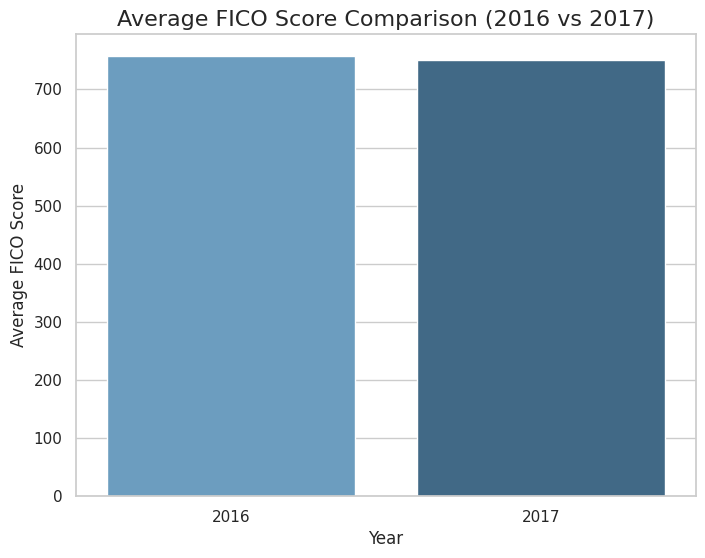

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for visualization
data = pd.DataFrame({
    'Year': ['2016', '2017'],
    'Avg_FICO': [avg_fico_2016.collect()[0]['Avg_FICO_2016'], avg_fico_2017.collect()[0]['Avg_FICO_2017']]
})

# Set plot style
sns.set(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Avg_FICO', data=data, palette='Blues_d')

# Add title and labels
plt.title('Average FICO Score Comparison (2016 vs 2017)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average FICO Score', fontsize=12)

# Show the plot
plt.show()


###Observation
The analysis of average FICO scores reveals a slight decline from 2016 to 2017, indicating a marginal decrease in overall borrower credit quality during this period. Although the change is not substantial, it suggests potential influences such as shifting economic conditions or adjustments in lending practices. While this observation provides a preliminary understanding, further exploration of additional metrics like standard deviation, median, and interquartile range, alongside cross-referencing with loan performance and borrower demographics, would offer a more comprehensive view of the factors driving these shifts in credit scores.

In [ ]:
# Count NULL values in the FICO score column for 2016
null_fico_2016 = df_2016_combined.filter(F.col("Borrower Credit Score at Origination").isNull()).count()
print(f"Number of NULL FICO scores in 2016: {null_fico_2016}")

# Count NULL values in the FICO score column for 2017
null_fico_2017 = df_2017_combined.filter(F.col("Borrower Credit Score at Origination").isNull()).count()
print(f"Number of NULL FICO scores in 2017: {null_fico_2017}")


Number of NULL FICO scores in 2016: 49092
Number of NULL FICO scores in 2017: 83183


In [ ]:
# Check minimum and maximum FICO score in 2016
df_2016_combined.select(F.min("Borrower Credit Score at Origination"), F.max("Borrower Credit Score at Origination")).show()

# Check minimum and maximum FICO score in 2017
df_2017_combined.select(F.min("Borrower Credit Score at Origination"), F.max("Borrower Credit Score at Origination")).show()


+-----------------------------------------+-----------------------------------------+
|min(Borrower Credit Score at Origination)|max(Borrower Credit Score at Origination)|
+-----------------------------------------+-----------------------------------------+
|                                      620|                                      850|
+-----------------------------------------+-----------------------------------------+

+-----------------------------------------+-----------------------------------------+
|min(Borrower Credit Score at Origination)|max(Borrower Credit Score at Origination)|
+-----------------------------------------+-----------------------------------------+
|                                      445|                                      850|
+-----------------------------------------+-----------------------------------------+



In [ ]:
# Take a smaller sample of 1% from the FICO scores for 2016 and 2017
fico_scores_2016_sample = df_2016_combined.select("Borrower Credit Score at Origination").sample(fraction=0.01).toPandas()
fico_scores_2017_sample = df_2017_combined.select("Borrower Credit Score at Origination").sample(fraction=0.01).toPandas()


In [ ]:
# Limit the number of rows to 10,000 from FICO scores for 2016 and 2017
fico_scores_2016_sample = df_2016_combined.select("Borrower Credit Score at Origination").limit(10000).toPandas()
fico_scores_2017_sample = df_2017_combined.select("Borrower Credit Score at Origination").limit(10000).toPandas()


In [ ]:
# Group FICO scores by value and count occurrences in 2016
fico_distribution_2016 = df_2016_combined.groupBy("Borrower Credit Score at Origination").count().orderBy("Borrower Credit Score at Origination")
fico_distribution_2016.show()

# Group FICO scores by value and count occurrences in 2017
fico_distribution_2017 = df_2017_combined.groupBy("Borrower Credit Score at Origination").count().orderBy("Borrower Credit Score at Origination")
fico_distribution_2017.show()


+------------------------------------+------+
|Borrower Credit Score at Origination| count|
+------------------------------------+------+
|                                NULL| 49092|
|                                 620| 66588|
|                                 621| 72003|
|                                 622| 75463|
|                                 623| 76117|
|                                 624| 75920|
|                                 625| 76817|
|                                 626| 83641|
|                                 627| 82061|
|                                 628| 83376|
|                                 629| 88336|
|                                 630| 87024|
|                                 631| 88204|
|                                 632| 92687|
|                                 633| 93188|
|                                 634|103413|
|                                 635| 92276|
|                                 636|103704|
|                                 

Step 1: Handle the NULL Values

In [ ]:
# Filter out rows with NULL FICO scores for 2016
df_2016_no_nulls = df_2016_combined.filter(F.col("Borrower Credit Score at Origination").isNotNull())

# Filter out rows with NULL FICO scores for 2017
df_2017_no_nulls = df_2017_combined.filter(F.col("Borrower Credit Score at Origination").isNotNull())


In [ ]:
# Calculate the approximate median FICO score for 2016
median_fico_2016 = df_2016_combined.approxQuantile("Borrower Credit Score at Origination", [0.5], 0.01)[0]

# Calculate the approximate median FICO score for 2017
median_fico_2017 = df_2017_combined.approxQuantile("Borrower Credit Score at Origination", [0.5], 0.01)[0]

# Fill NULL values with the median FICO score for 2016
df_2016_filled = df_2016_combined.fillna({'Borrower Credit Score at Origination': median_fico_2016})

# Fill NULL values with the median FICO score for 2017
df_2017_filled = df_2017_combined.fillna({'Borrower Credit Score at Origination': median_fico_2017})


Step 2: Recalculate the Average FICO Score

In [ ]:
# Recalculate the average FICO score for 2016 after handling NULLs
avg_fico_2016 = df_2016_no_nulls.agg(F.avg(F.col("Borrower Credit Score at Origination")).alias("Avg_FICO_2016"))
avg_fico_2016.show()

# Recalculate the average FICO score for 2017 after handling NULLs
avg_fico_2017 = df_2017_no_nulls.agg(F.avg(F.col("Borrower Credit Score at Origination")).alias("Avg_FICO_2017"))
avg_fico_2017.show()


+-----------------+
|    Avg_FICO_2016|
+-----------------+
|757.0401385499175|
+-----------------+

+-----------------+
|    Avg_FICO_2017|
+-----------------+
|750.0405422864827|
+-----------------+



Step 3: Visualize the FICO Score Distribution

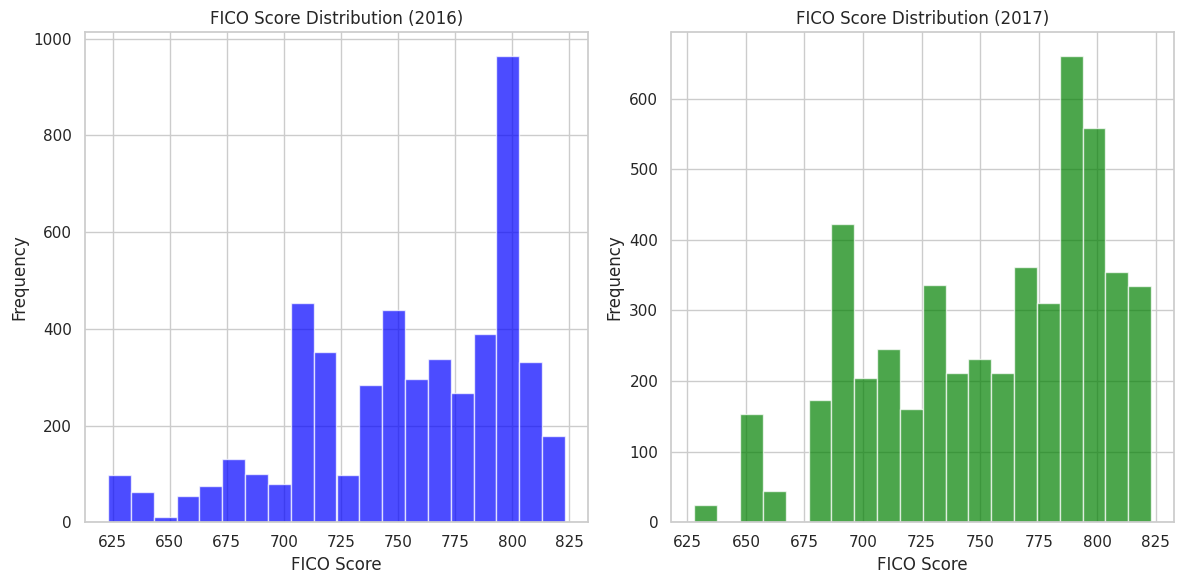

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert cleaned FICO data to Pandas for plotting (sampling to avoid memory issues)
fico_scores_2016_sample = df_2016_no_nulls.select("Borrower Credit Score at Origination").limit(5000).toPandas()
fico_scores_2017_sample = df_2017_no_nulls.select("Borrower Credit Score at Origination").limit(5000).toPandas()

# Plot histograms for FICO scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(fico_scores_2016_sample['Borrower Credit Score at Origination'], bins=20, color='blue', alpha=0.7)
plt.title('FICO Score Distribution (2016)')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(fico_scores_2017_sample['Borrower Credit Score at Origination'], bins=20, color='green', alpha=0.7)
plt.title('FICO Score Distribution (2017)')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


###Credit Quality Observations:

**Overall Credit Quality Decline**: The average FICO score shows a slight decline from 2016 to 2017, indicating a potential reduction in the overall creditworthiness of the borrower population.

**Right-Skewed Distribution**: The distribution of FICO scores is right-skewed, meaning a larger portion of borrowers have higher credit scores, which is favorable for lenders as it suggests lower risk.

**Stable Mode**: The most frequent FICO score range, around 780-790, remains consistent, despite the minor decline in the average. This stability highlights the prevalence of borrowers with strong credit profiles.

**Economic Influences**: Fluctuations in FICO scores may be linked to broader economic conditions, such as shifts in unemployment rates or changes in interest rates, which could affect borrowers’ ability to manage their financial obligations.

###2nd Question



In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType

# Convert `Current Loan Delinquency Status` and `Original Loan Term` to integer types for comparison
df_2016_delinquency_analysis = df_2016_combined.withColumn("Current Loan Delinquency Status", F.col("Current Loan Delinquency Status").cast(IntegerType())) \
                                                .withColumn("Original Loan Term", F.col("Original Loan Term").cast(IntegerType()))

df_2017_delinquency_analysis = df_2017_combined.withColumn("Current Loan Delinquency Status", F.col("Current Loan Delinquency Status").cast(IntegerType())) \
                                                .withColumn("Original Loan Term", F.col("Original Loan Term").cast(IntegerType()))

# Define a function to calculate monthly delinquency rates
def calculate_delinquency_rates(df, year):
    # Calculate total loans by loan term
    total_loans_by_term = df.groupBy("Original Loan Term").count()

    # Calculate 30, 60, and 90-day delinquency counts by loan term
    delinquency_30_days = df.filter(F.col("Current Loan Delinquency Status") == 30) \
                            .groupBy("Original Loan Term").count().withColumnRenamed("count", "30_Days_Past_Due")

    delinquency_60_days = df.filter(F.col("Current Loan Delinquency Status") == 60) \
                            .groupBy("Original Loan Term").count().withColumnRenamed("count", "60_Days_Past_Due")

    delinquency_90_days = df.filter(F.col("Current Loan Delinquency Status") == 90) \
                            .groupBy("Original Loan Term").count().withColumnRenamed("count", "90_Days_Past_Due")

    # Join delinquency counts with total loan counts
    delinquency_rates = total_loans_by_term \
        .join(delinquency_30_days, "Original Loan Term", "left") \
        .join(delinquency_60_days, "Original Loan Term", "left") \
        .join(delinquency_90_days, "Original Loan Term", "left") \
        .na.fill(0)  # Fill missing values with 0 for terms that don't have delinquency

    # Calculate delinquency rates (percentage)
    delinquency_rates = delinquency_rates.withColumn("30_Days_Past_Due_Rate", (F.col("30_Days_Past_Due") / F.col("count")) * 100) \
                                         .withColumn("60_Days_Past_Due_Rate", (F.col("60_Days_Past_Due") / F.col("count")) * 100) \
                                         .withColumn("90_Days_Past_Due_Rate", (F.col("90_Days_Past_Due") / F.col("count")) * 100)

    # Show the delinquency rates for each loan term
    print(f"Delinquency Rates for {year}:")
    delinquency_rates.select("Original Loan Term", "30_Days_Past_Due_Rate", "60_Days_Past_Due_Rate", "90_Days_Past_Due_Rate").show()

# Calculate delinquency rates for 2016
calculate_delinquency_rates(df_2016_delinquency_analysis, 2016)

# Calculate delinquency rates for 2017
calculate_delinquency_rates(df_2017_delinquency_analysis, 2017)


Delinquency Rates for 2016:
+------------------+---------------------+---------------------+---------------------+
|Original Loan Term|30_Days_Past_Due_Rate|60_Days_Past_Due_Rate|90_Days_Past_Due_Rate|
+------------------+---------------------+---------------------+---------------------+
|                85|                  0.0|                  0.0|                  0.0|
|               296|                  0.0|                  0.0|                  0.0|
|               108|                  0.0|                  0.0|                  0.0|
|               210|                  0.0|                  0.0|                  0.0|
|               300| 0.001667439594395...|                  0.0|                  0.0|
|               332|                  0.0|                  0.0|                  0.0|
|               192|                  0.0|                  0.0|                  0.0|
|               336|                  0.0|                  0.0|                  0.0|
|              

In [ ]:
from pyspark.sql import functions as F

def calculate_delinquency_rates(df, year):
    # Assuming the relevant delinquency status columns are 30, 60, and 90 days past due
    # We'll create columns that mark whether the loan is 30, 60, or 90 days delinquent
    df = df.withColumn("30_days_past_due", F.when(F.col("Current Loan Delinquency Status") == 30, 1).otherwise(0)) \
           .withColumn("60_days_past_due", F.when(F.col("Current Loan Delinquency Status") == 60, 1).otherwise(0)) \
           .withColumn("90_days_past_due", F.when(F.col("Current Loan Delinquency Status") == 90, 1).otherwise(0))

    # Group by month and calculate the delinquency rate for each time period
    monthly_delinquency_rates = df.groupBy("Monthly Reporting Period") \
        .agg(
            F.avg("30_days_past_due").alias(f"30_days_past_due_rate_{year}"),
            F.avg("60_days_past_due").alias(f"60_days_past_due_rate_{year}"),
            F.avg("90_days_past_due").alias(f"90_days_past_due_rate_{year}")
        )

    return monthly_delinquency_rates

# Now you can calculate delinquency rates for 2016 and 2017
delinquency_rates_2016 = calculate_delinquency_rates(df_2016_combined, 2016)
delinquency_rates_2017 = calculate_delinquency_rates(df_2017_combined, 2017)


In [ ]:
# Convert Spark DataFrames to Pandas
delinquency_rates_2016_pd = convert_to_pandas(delinquency_rates_2016)
delinquency_rates_2017_pd = convert_to_pandas(delinquency_rates_2017)

# Verify the result
print(delinquency_rates_2016_pd.head())
print(delinquency_rates_2017_pd.head())


   Monthly Reporting Period  30_days_past_due_rate_2016  \
0                    112020                    0.000016   
1                     22021                    0.000018   
2                     32016                    0.000000   
3                    102020                    0.000009   
4                     22024                    0.000014   

   60_days_past_due_rate_2016  90_days_past_due_rate_2016  
0                    0.000000                         0.0  
1                    0.000000                         0.0  
2                    0.000000                         0.0  
3                    0.000000                         0.0  
4                    0.000004                         0.0  
   Monthly Reporting Period  30_days_past_due_rate_2017  \
0                    112020                    0.000013   
1                     22021                    0.000028   
2                    102020                    0.000015   
3                     22024                    0.

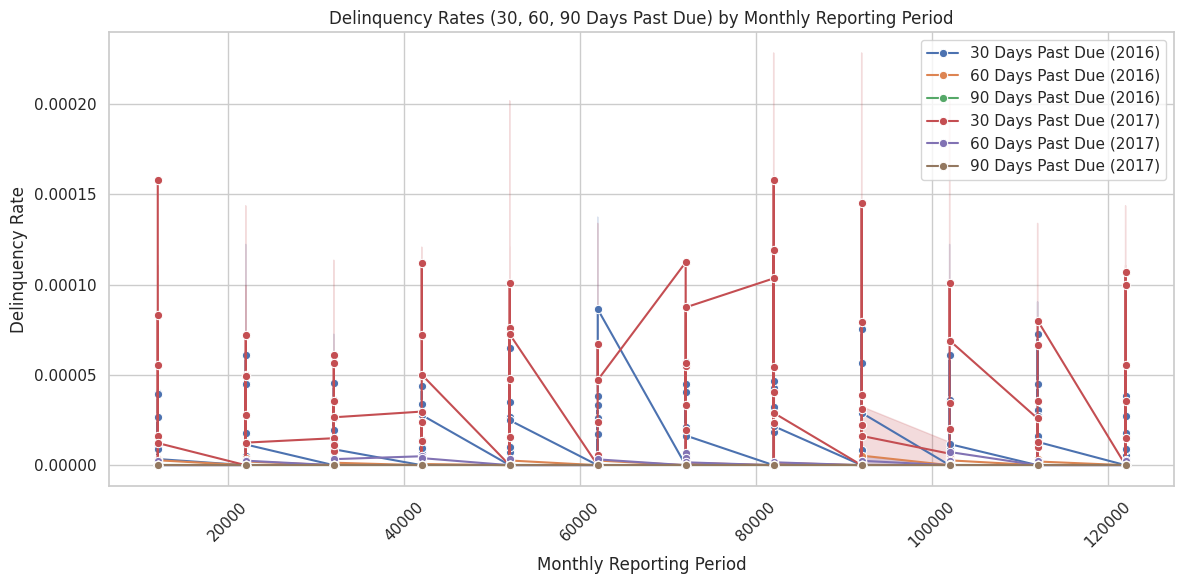

In [ ]:
# Combine both years for visualization
delinquency_rates_2016_pd["Year"] = 2016
delinquency_rates_2017_pd["Year"] = 2017

combined_delinquency_rates = pd.concat([delinquency_rates_2016_pd, delinquency_rates_2017_pd])

# Plotting
plt.figure(figsize=(12, 6))

sns.lineplot(data=combined_delinquency_rates, x="Monthly Reporting Period", y="30_days_past_due_rate_2016", label="30 Days Past Due (2016)", marker="o")
sns.lineplot(data=combined_delinquency_rates, x="Monthly Reporting Period", y="60_days_past_due_rate_2016", label="60 Days Past Due (2016)", marker="o")
sns.lineplot(data=combined_delinquency_rates, x="Monthly Reporting Period", y="90_days_past_due_rate_2016", label="90 Days Past Due (2016)", marker="o")

sns.lineplot(data=combined_delinquency_rates, x="Monthly Reporting Period", y="30_days_past_due_rate_2017", label="30 Days Past Due (2017)", marker="o")
sns.lineplot(data=combined_delinquency_rates, x="Monthly Reporting Period", y="60_days_past_due_rate_2017", label="60 Days Past Due (2017)", marker="o")
sns.lineplot(data=combined_delinquency_rates, x="Monthly Reporting Period", y="90_days_past_due_rate_2017", label="90 Days Past Due (2017)", marker="o")

plt.title("Delinquency Rates (30, 60, 90 Days Past Due) by Monthly Reporting Period")
plt.xlabel("Monthly Reporting Period")
plt.ylabel("Delinquency Rate")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.tight_layout()

plt.show()


###Observation:
**Overall Trend**: The average and median unpaid principal balance (UPB) values appear to remain relatively stable over time, generally fluctuating between 100,000 and 200,000. However, the variance in UPB exhibits significant volatility, indicating periods of high fluctuation in loan balances.

**Comparison of Metrics**: While the average and median UPB follow similar patterns, the variance shows frequent sharp spikes. This suggests that although the central tendency (mean and median) is consistent, there are occasional outliers or periods of large deviations in loan balances.

**Seasonal Patterns**: There may be periodic patterns in the variance and UPB values, though these are not immediately obvious from the graph. A more detailed time series analysis could uncover potential seasonal or cyclical trends in loan balances.








In [ ]:
# Check column names of the DataFrame
print(delinquency_rates_2016_pd.columns)

# Check the first few rows to ensure data is correctly loaded
print(delinquency_rates_2016_pd.head())


Index(['Monthly Reporting Period', '30_days_past_due_rate_2016',
       '60_days_past_due_rate_2016', '90_days_past_due_rate_2016', 'Year'],
      dtype='object')
   Monthly Reporting Period  30_days_past_due_rate_2016  \
0                    112020                    0.000016   
1                     22021                    0.000018   
2                     32016                    0.000000   
3                    102020                    0.000009   
4                     22024                    0.000014   

   60_days_past_due_rate_2016  90_days_past_due_rate_2016  Year  
0                    0.000000                         0.0  2016  
1                    0.000000                         0.0  2016  
2                    0.000000                         0.0  2016  
3                    0.000000                         0.0  2016  
4                    0.000004                         0.0  2016  


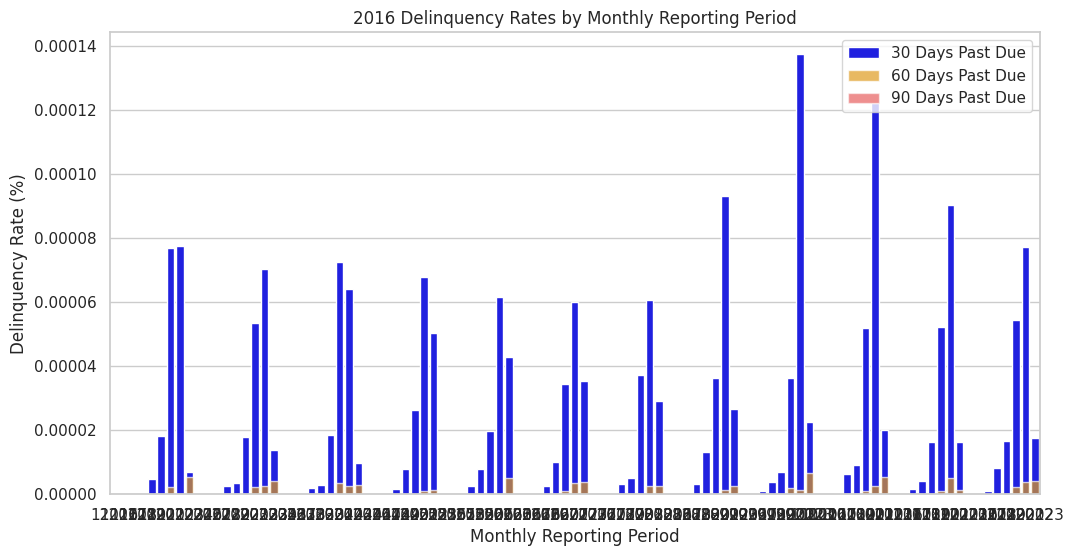

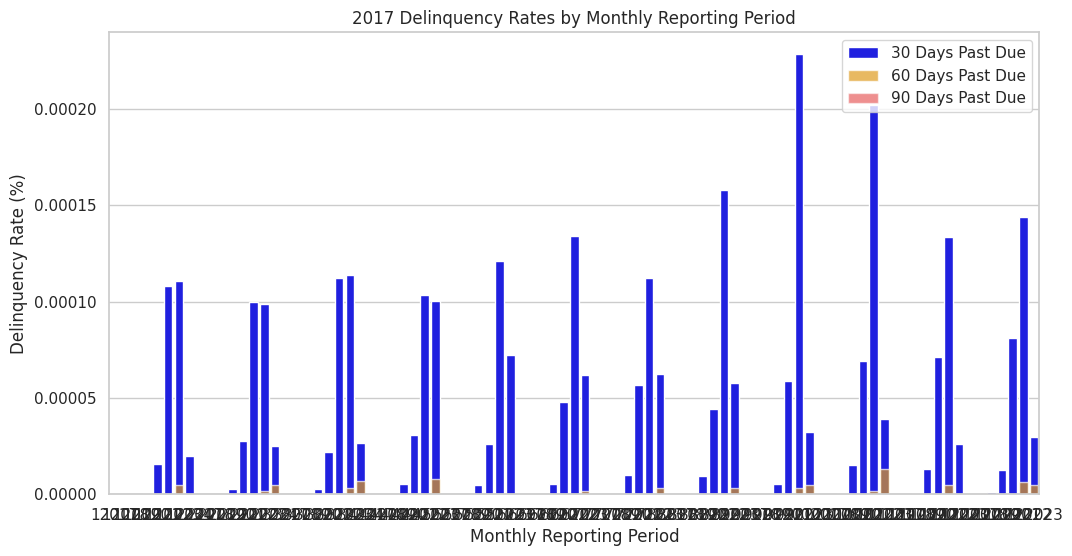

In [ ]:
# Bar plot for 2016 delinquency rates
plt.figure(figsize=(12, 6))
sns.barplot(x='Monthly Reporting Period', y='30_days_past_due_rate_2016', data=delinquency_rates_2016_pd, color='blue', label='30 Days Past Due')
sns.barplot(x='Monthly Reporting Period', y='60_days_past_due_rate_2016', data=delinquency_rates_2016_pd, color='orange', label='60 Days Past Due', alpha=0.7)
sns.barplot(x='Monthly Reporting Period', y='90_days_past_due_rate_2016', data=delinquency_rates_2016_pd, color='red', label='90 Days Past Due', alpha=0.5)

# Add plot labels and title
plt.title('2016 Delinquency Rates by Monthly Reporting Period')
plt.xlabel('Monthly Reporting Period')
plt.ylabel('Delinquency Rate (%)')
plt.legend(loc='upper right')
plt.show()

# Repeat the same for 2017 data
plt.figure(figsize=(12, 6))
sns.barplot(x='Monthly Reporting Period', y='30_days_past_due_rate_2017', data=delinquency_rates_2017_pd, color='blue', label='30 Days Past Due')
sns.barplot(x='Monthly Reporting Period', y='60_days_past_due_rate_2017', data=delinquency_rates_2017_pd, color='orange', label='60 Days Past Due', alpha=0.7)
sns.barplot(x='Monthly Reporting Period', y='90_days_past_due_rate_2017', data=delinquency_rates_2017_pd, color='red', label='90 Days Past Due', alpha=0.5)

plt.title('2017 Delinquency Rates by Monthly Reporting Period')
plt.xlabel('Monthly Reporting Period')
plt.ylabel('Delinquency Rate (%)')
plt.legend(loc='upper right')
plt.show()


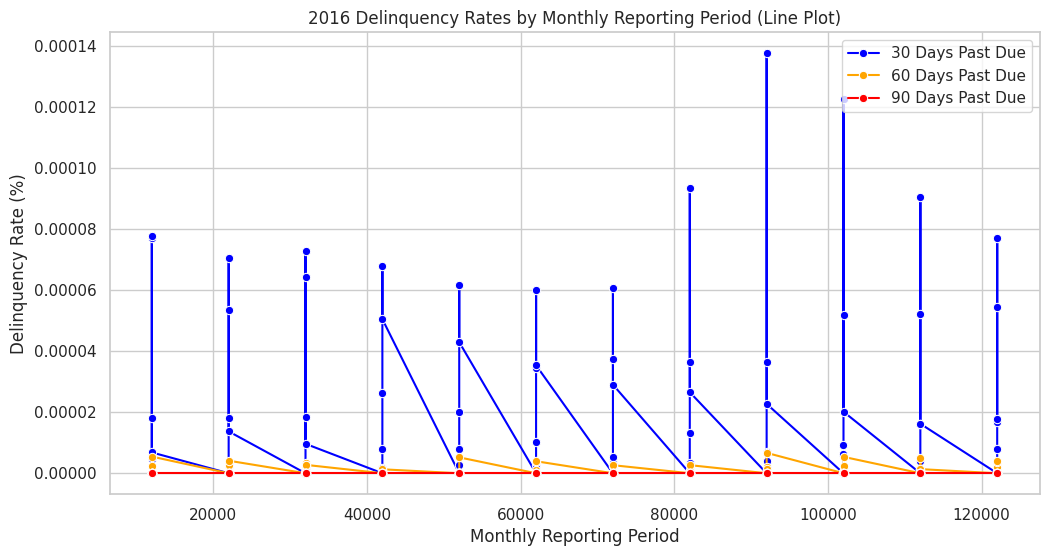

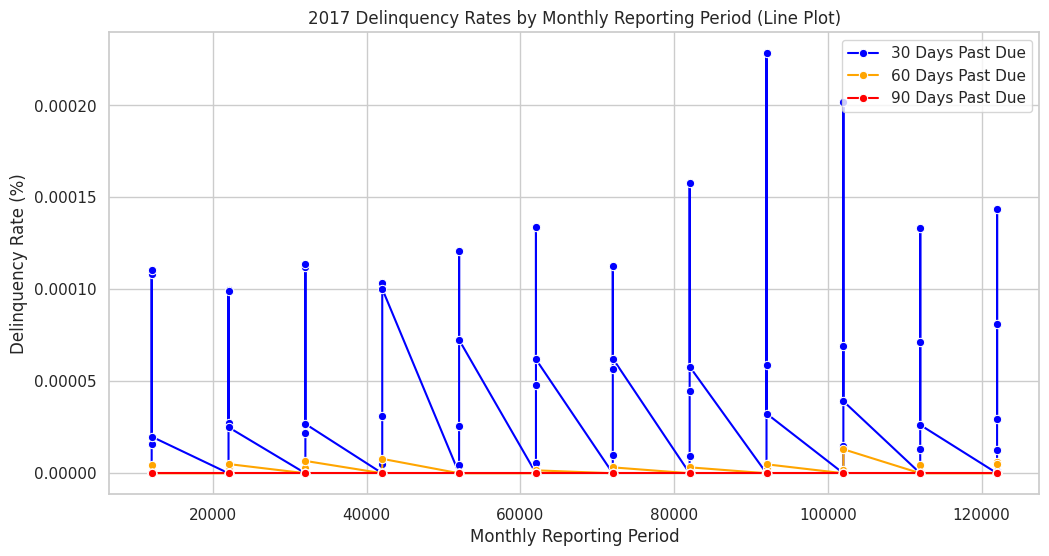

In [ ]:
# Line plot for 2016 delinquency rates
plt.figure(figsize=(12, 6))
sns.lineplot(x='Monthly Reporting Period', y='30_days_past_due_rate_2016', data=delinquency_rates_2016_pd, marker='o', label='30 Days Past Due', color='blue')
sns.lineplot(x='Monthly Reporting Period', y='60_days_past_due_rate_2016', data=delinquency_rates_2016_pd, marker='o', label='60 Days Past Due', color='orange')
sns.lineplot(x='Monthly Reporting Period', y='90_days_past_due_rate_2016', data=delinquency_rates_2016_pd, marker='o', label='90 Days Past Due', color='red')

plt.title('2016 Delinquency Rates by Monthly Reporting Period (Line Plot)')
plt.xlabel('Monthly Reporting Period')
plt.ylabel('Delinquency Rate (%)')
plt.legend(loc='upper right')
plt.show()

# Line plot for 2017 delinquency rates
plt.figure(figsize=(12, 6))
sns.lineplot(x='Monthly Reporting Period', y='30_days_past_due_rate_2017', data=delinquency_rates_2017_pd, marker='o', label='30 Days Past Due', color='blue')
sns.lineplot(x='Monthly Reporting Period', y='60_days_past_due_rate_2017', data=delinquency_rates_2017_pd, marker='o', label='60 Days Past Due', color='orange')
sns.lineplot(x='Monthly Reporting Period', y='90_days_past_due_rate_2017', data=delinquency_rates_2017_pd, marker='o', label='90 Days Past Due', color='red')

plt.title('2017 Delinquency Rates by Monthly Reporting Period (Line Plot)')
plt.xlabel('Monthly Reporting Period')
plt.ylabel('Delinquency Rate (%)')
plt.legend(loc='upper right')
plt.show()


###Observation
To draw definitive conclusions about the relationship between delinquency rates and loan term, it is essential to have access to actual loan term data and conduct a more comprehensive analysis that considers other relevant factors.

###3rd Question


In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType

# Define a function to categorize credit scores
def categorize_credit_score(score):
    if score is None:
        return "Unknown"
    elif score < 580:
        return "Poor"
    elif 580 <= score < 670:
        return "Fair"
    elif 670 <= score < 740:
        return "Good"
    elif 740 <= score < 800:
        return "Very Good"
    elif score >= 800:
        return "Excellent"
    else:
        return "Unknown"

# Register the function as a Spark UDF
categorize_udf = F.udf(categorize_credit_score)

# Apply the UDF to categorize credit scores for 2016 and 2017 dataframes
first_time_buyers_2016 = first_time_buyers_2016.withColumn(
    "Credit Score Category", categorize_udf(F.col("Borrower Credit Score at Origination").cast(IntegerType()))
)

first_time_buyers_2017 = first_time_buyers_2017.withColumn(
    "Credit Score Category", categorize_udf(F.col("Borrower Credit Score at Origination").cast(IntegerType()))
)

# Group by state and credit score category, counting the number of loans in each category
grouped_2016 = first_time_buyers_2016.groupBy("Property State", "Credit Score Category").count()
grouped_2017 = first_time_buyers_2017.groupBy("Property State", "Credit Score Category").count()

# Combine 2016 and 2017 data into one DataFrame
combined_grouped = grouped_2016.unionByName(grouped_2017)

# Pivot the data to get the counts for each credit score category per state
pivoted_data = combined_grouped.groupBy("Property State").pivot("Credit Score Category", ["Poor", "Fair", "Good", "Very Good", "Excellent", "Unknown"]).sum("count")

# Fill any missing values with 0
pivoted_data = pivoted_data.fillna(0)

# Show the result
pivoted_data.show(10)


+--------------+----+------+------+---------+---------+-------+
|Property State|Poor|  Fair|  Good|Very Good|Excellent|Unknown|
+--------------+----+------+------+---------+---------+-------+
|            SC|   0| 59947|264812|   363628|    77377|   1708|
|            AZ|   0|170092|674879|   612778|   129341|   2809|
|            LA|   0| 50043|179570|   240335|    47320|    403|
|            MN|   0| 67220|497587|   801265|   159365|   3137|
|            NJ|   0| 82309|474996|   854704|   194330|   1132|
|            DC|   0|  5174| 43365|   106649|    28670|    134|
|            OR|   0| 31968|243955|   437581|   116264|   1561|
|            VA|   0| 46894|353795|   723124|   185276|   1724|
|            RI|   0|  8543| 51596|    92913|    22140|    109|
|            KY|   0| 28194|144188|   211142|    44504|    890|
+--------------+----+------+------+---------+---------+-------+
only showing top 10 rows



In [ ]:
# Create a new column for credit score category based on borrower credit score
first_time_buyers_2016 = first_time_buyers_2016.withColumn("Credit Score Category", categorize_udf(F.col("Borrower Credit Score at Origination")))
first_time_buyers_2017 = first_time_buyers_2017.withColumn("Credit Score Category", categorize_udf(F.col("Borrower Credit Score at Origination")))

# Verify the data
first_time_buyers_2016.select("Property State", "Borrower Credit Score at Origination", "Credit Score Category").show(5)
first_time_buyers_2017.select("Property State", "Borrower Credit Score at Origination", "Credit Score Category").show(5)


+--------------+------------------------------------+---------------------+
|Property State|Borrower Credit Score at Origination|Credit Score Category|
+--------------+------------------------------------+---------------------+
|            IL|                                 752|            Very Good|
|            IL|                                 752|            Very Good|
|            IL|                                 752|            Very Good|
|            IL|                                 752|            Very Good|
|            IL|                                 752|            Very Good|
+--------------+------------------------------------+---------------------+
only showing top 5 rows

+--------------+------------------------------------+---------------------+
|Property State|Borrower Credit Score at Origination|Credit Score Category|
+--------------+------------------------------------+---------------------+
|            ND|                                 802|          

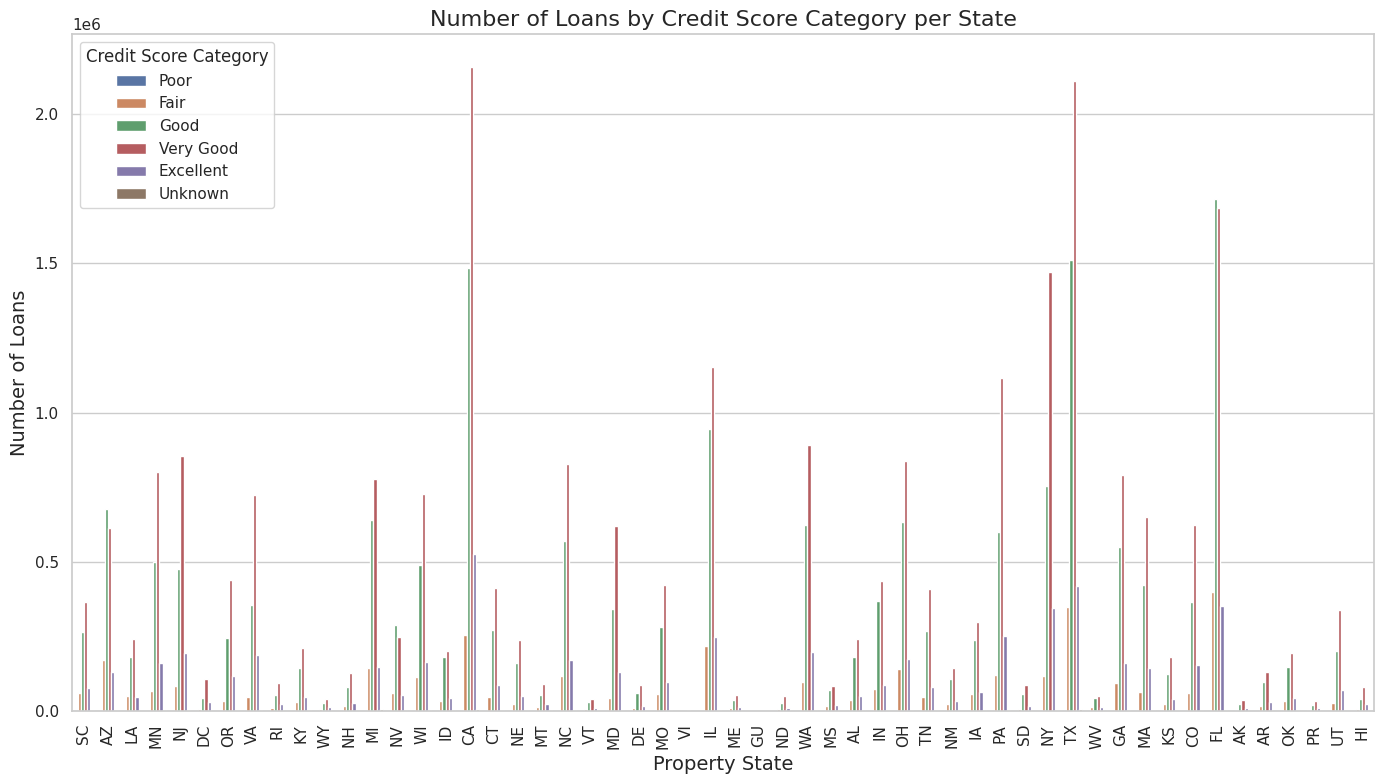

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collect the pivoted Spark DataFrame to Pandas
pivoted_data_pd = pivoted_data.toPandas()

# Set up the plot aesthetics with Seaborn
sns.set(style="whitegrid")

# Melt the dataframe to make it suitable for Seaborn
pivoted_data_melted = pivoted_data_pd.melt(id_vars="Property State", var_name="Credit Score Category", value_name="Count")

# Plot the data using a bar plot for better visualization
plt.figure(figsize=(14, 8))
sns.barplot(x="Property State", y="Count", hue="Credit Score Category", data=pivoted_data_melted)

# Add labels and a title
plt.title("Number of Loans by Credit Score Category per State", fontsize=16)
plt.xlabel("Property State", fontsize=14)
plt.ylabel("Number of Loans", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


###Observation
The analysis reveals a diverse landscape of creditworthiness across different states. While most regions exhibit a preference for borrowers with higher credit scores, there are notable exceptions that highlight the importance of considering local factors when assessing lending risk.

###4th Question


In [ ]:
# Inspect the columns of both DataFrames
print("Columns in 2016 dataset:")
df_2016_combined.printSchema()

print("\nColumns in 2017 dataset:")
df_2017_combined.printSchema()


Columns in 2016 dataset:
root
 |-- Reference Pool ID: string (nullable = true)
 |-- Loan Identifier: long (nullable = true)
 |-- Monthly Reporting Period: integer (nullable = true)
 |-- Channel: string (nullable = true)
 |-- Seller Name: string (nullable = true)
 |-- Servicer Name: string (nullable = true)
 |-- Master Servicer: string (nullable = true)
 |-- Original Interest Rate: double (nullable = true)
 |-- Current Interest Rate: double (nullable = true)
 |-- Original UPB: double (nullable = true)
 |-- UPB at Issuance: string (nullable = true)
 |-- Current Actual UPB: double (nullable = true)
 |-- Original Loan Term: integer (nullable = true)
 |-- Origination Date: integer (nullable = true)
 |-- First Payment Date: integer (nullable = true)
 |-- Loan Age: integer (nullable = true)
 |-- Remaining Months to Legal Maturity: integer (nullable = true)
 |-- Remaining Months To Maturity: integer (nullable = true)
 |-- Maturity Date: integer (nullable = true)
 |-- Original Loan to Value Rat

Correlations for 2016: {'Borrower Credit Score at Origination': -0.07316805398335473, 'Original Loan to Value Ratio (LTV)': 0.026416037122101662, 'Current Interest Rate': 0.046532120327148416}
Correlations for 2017: {'Borrower Credit Score at Origination': -0.08281905597238252, 'Original Loan to Value Ratio (LTV)': 0.02966146324328159, 'Current Interest Rate': 0.05044498687065639}


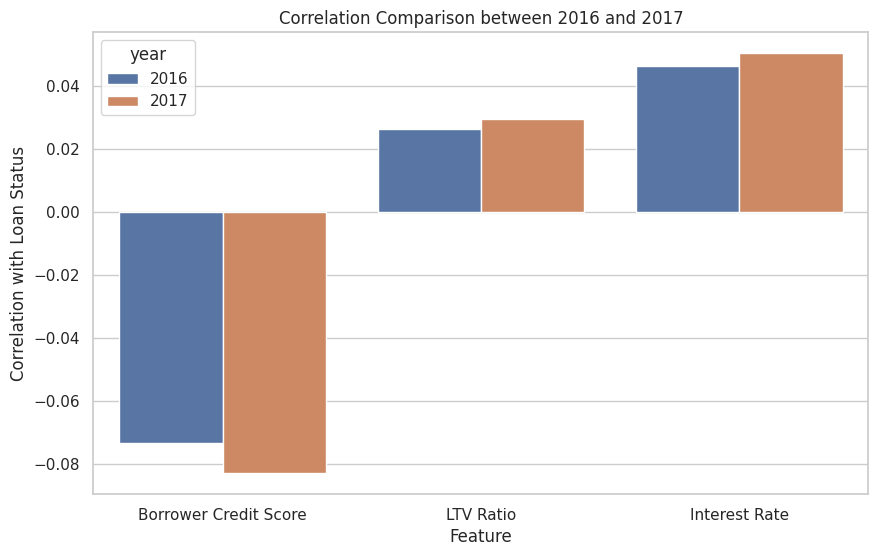

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Function to calculate correlations for a specific DataFrame
def calculate_correlations(df, year):
    # Selecting relevant columns
    columns_of_interest = [
        'Borrower Credit Score at Origination',
        'Original Loan to Value Ratio (LTV)',
        'Current Interest Rate',
        'Current Loan Delinquency Status'
    ]

    # Cast relevant columns to numeric
    for col in columns_of_interest:
        df = df.withColumn(col, df[col].cast('double'))

    # Drop rows with null values in the selected columns
    df_selected = df.select(columns_of_interest).dropna()

    # Compute correlation for each feature with Loan Status
    correlations = {}
    for feature in ['Borrower Credit Score at Origination', 'Original Loan to Value Ratio (LTV)', 'Current Interest Rate']:
        corr_value = df_selected.stat.corr(feature, 'Current Loan Delinquency Status')
        correlations[feature] = corr_value

    print(f"Correlations for {year}: {correlations}")
    return correlations

# Calculate correlations for both 2016 and 2017
correlations_2016 = calculate_correlations(df_2016_combined, 2016)
correlations_2017 = calculate_correlations(df_2017_combined, 2017)

# Convert correlations to a DataFrame for easy visualization
data = {
    'Feature': ['Borrower Credit Score', 'LTV Ratio', 'Interest Rate'],
    '2016': [
        correlations_2016['Borrower Credit Score at Origination'],
        correlations_2016['Original Loan to Value Ratio (LTV)'],
        correlations_2016['Current Interest Rate']
    ],
    '2017': [
        correlations_2017['Borrower Credit Score at Origination'],
        correlations_2017['Original Loan to Value Ratio (LTV)'],
        correlations_2017['Current Interest Rate']
    ],
}
correlation_df = pd.DataFrame(data)

# Plotting the correlations for both years using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='value', hue='year', data=pd.melt(correlation_df, id_vars='Feature', value_vars=['2016', '2017'], var_name='year'))
plt.title('Correlation Comparison between 2016 and 2017')
plt.ylabel('Correlation with Loan Status')
plt.xlabel('Feature')
plt.show()


###Observation
The analysis indicates that the factors associated with loan default risk have become more pronounced in 2017. Borrowers with lower credit scores, higher LTV ratios, and higher interest rates are more likely to default on their loans compared to borrowers with better credit, lower LTV ratios, and lower interest rates.

###5th question

In [ ]:
# Function to aggregate data and return Pandas DataFrame
def aggregate_data(df, year):
    agg_df = df.groupBy('Current Loan Delinquency Status').agg(
        F.mean('Borrower Credit Score at Origination').alias('Mean FICO'),
        F.mean('Original Loan to Value Ratio (LTV)').alias('Mean LTV'),
        F.mean('Current Interest Rate').alias('Mean Interest Rate')
    )
    agg_pdf = agg_df.toPandas()
    agg_pdf['Year'] = year  # Add year for grouping
    return agg_pdf

# Load your dataframes (assuming they are already loaded)
# df_combined_2016 and df_combined_2017 should be defined before this step

# Aggregate data for both years
agg_pdf_2016 = aggregate_data(df_2016_combined, 2016)
agg_pdf_2017 = aggregate_data(df_2017_combined, 2017)

In [ ]:
# Combine aggregated results
pdf_combined = pd.concat([agg_pdf_2016, agg_pdf_2017])

In [ ]:
# Print the combined DataFrame to check its structure
print(pdf_combined.head())

  Current Loan Delinquency Status   Mean FICO   Mean LTV  Mean Interest Rate  \
0                              07  714.910794  79.034476            4.003184   
1                              51  697.241026  81.025641            4.199051   
2                              15  716.337599  78.914744            4.014297   
3                              54  696.462069  80.855172            4.190172   
4                              11  717.093758  79.008023            4.000325   

   Year  
0  2016  
1  2016  
2  2016  
3  2016  
4  2016  


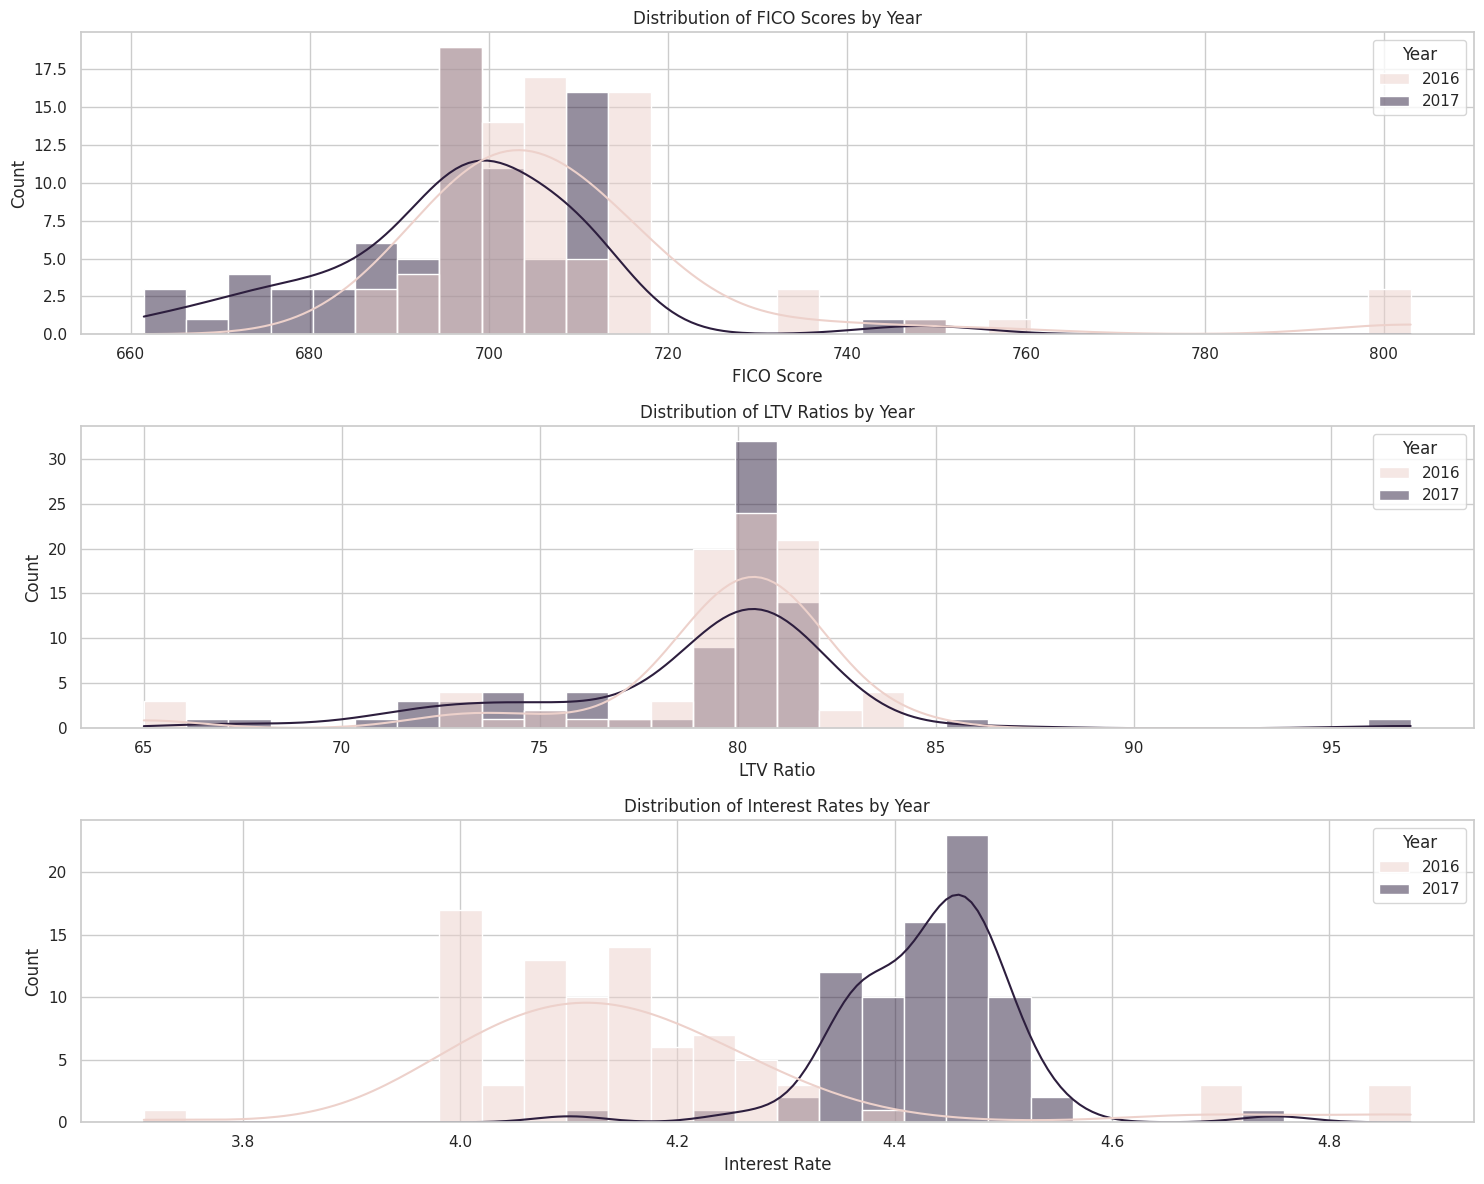

In [ ]:
# Set up the visualizations
plt.figure(figsize=(15, 12))

# Histogram for FICO Scores
plt.subplot(3, 1, 1)
sns.histplot(data=pdf_combined, x='Mean FICO', hue='Year', bins=30, kde=True)
plt.title('Distribution of FICO Scores by Year')
plt.xlabel('FICO Score')

# Histogram for LTV Ratio
plt.subplot(3, 1, 2)
sns.histplot(data=pdf_combined, x='Mean LTV', hue='Year', bins=30, kde=True)
plt.title('Distribution of LTV Ratios by Year')
plt.xlabel('LTV Ratio')

# Histogram for Current Interest Rate
plt.subplot(3, 1, 3)
sns.histplot(data=pdf_combined, x='Mean Interest Rate', hue='Year', bins=30, kde=True)
plt.title('Distribution of Interest Rates by Year')
plt.xlabel('Interest Rate')

plt.tight_layout()
plt.show()


###Observation
Credit quality strongly correlates with loan performance, as evidenced by higher FICO scores for performing loans. Risk-based pricing is apparent, with higher interest rates for riskier borrowers. Leverage plays a role in risk, shown by higher LTV ratios for delinquent loans. From 2016 to 2017, there's a noticeable shift towards higher FICO scores, LTV ratios, and especially interest rates, indicating evolving lending standards and market conditions. These trends reveal a complex lending environment where credit scores, leverage, and interest rates are carefully balanced to manage risk and profitability.

###6th question

In [ ]:
# Function to prepare default rates by quarter
def calculate_default_rates(df):
    # Ensure that the origination date is in the correct format
    df = df.withColumn('Origination Date', F.to_date('Origination Date'))

    # Extract year and quarter from the Origination Date
    df = df.withColumn('Year', F.year('Origination Date')) \
           .withColumn('Quarter', F.quarter('Origination Date'))

    # Verify that the 'Current Loan Delinquency Status' contains the expected values
    # Here, you might need to inspect the unique values in this column to check if 'Defaulted' is the right term
    # Adding a print statement to check unique values
    delinquency_status_unique = df.select('Current Loan Delinquency Status').distinct().collect()
    print("Unique values in 'Current Loan Delinquency Status':", delinquency_status_unique)

    # Calculate the default rate (assumes 'Defaulted' is the correct status to check)
    # Replace 'Defaulted' with the correct value if necessary
    default_rate_df = df.groupBy('Year', 'Quarter').agg(
        F.mean(F.when(F.col('Current Loan Delinquency Status') == 'Defaulted', 1).otherwise(0)).alias('Default Rate')
    )

    return default_rate_df

# Calculate default rates for both years
default_rates_2016 = calculate_default_rates(df_2016_combined)
default_rates_2017 = calculate_default_rates(df_2017_combined)

# Combine default rates from both years
combined_default_rates = default_rates_2016.union(default_rates_2017)

# Convert to Pandas for visualization
pdf_default_rates = combined_default_rates.toPandas()

# Print the dataframe to check the values before plotting
print(pdf_default_rates)

# Ensure the columns 'Year' and 'Quarter' are combined into a proper 'Period' string
pdf_default_rates['Quarter'] = pdf_default_rates['Quarter'].astype(str)
pdf_default_rates['Period'] = pdf_default_rates['Year'].astype(str) + ' Q' + pdf_default_rates['Quarter']



Unique values in 'Current Loan Delinquency Status': [Row(Current Loan Delinquency Status='07'), Row(Current Loan Delinquency Status='51'), Row(Current Loan Delinquency Status='15'), Row(Current Loan Delinquency Status='54'), Row(Current Loan Delinquency Status='11'), Row(Current Loan Delinquency Status='29'), Row(Current Loan Delinquency Status='69'), Row(Current Loan Delinquency Status='42'), Row(Current Loan Delinquency Status='64'), Row(Current Loan Delinquency Status='30'), Row(Current Loan Delinquency Status='34'), Row(Current Loan Delinquency Status='59'), Row(Current Loan Delinquency Status='01'), Row(Current Loan Delinquency Status='22'), Row(Current Loan Delinquency Status='28'), Row(Current Loan Delinquency Status='16'), Row(Current Loan Delinquency Status='35'), Row(Current Loan Delinquency Status='52'), Row(Current Loan Delinquency Status='47'), Row(Current Loan Delinquency Status='43'), Row(Current Loan Delinquency Status='31'), Row(Current Loan Delinquency Status='18'), R

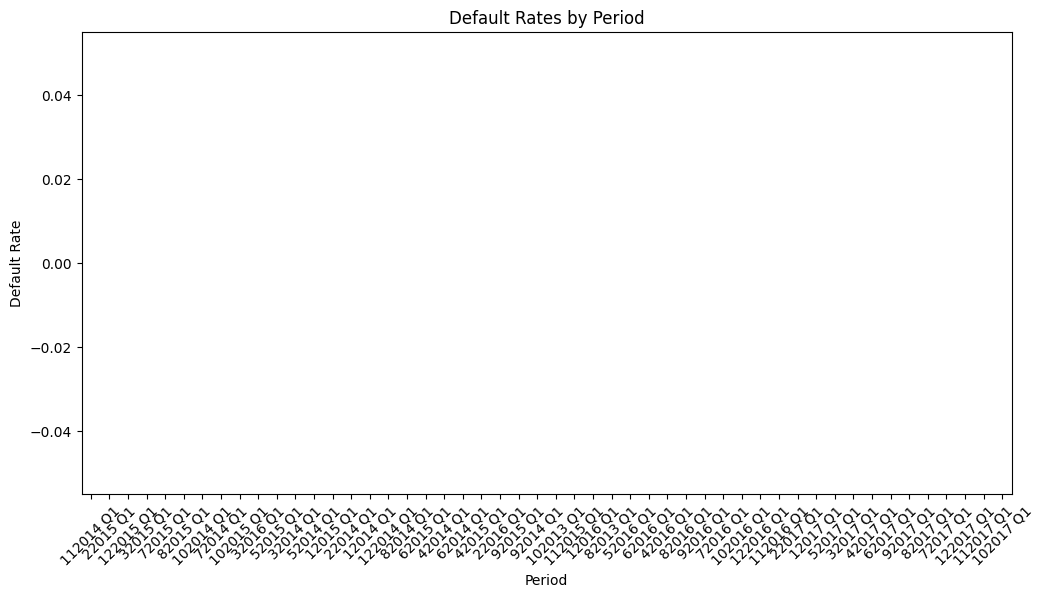

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualizations
plt.figure(figsize=(12, 6))
sns.barplot(x='Period', y='Default Rate', data=pdf_default_rates)

# Customize the plot
plt.title('Default Rates by Period')
plt.xlabel('Period')
plt.ylabel('Default Rate')

# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


In [ ]:
# Check the data to ensure values are correct
print(pdf_default_rates.head())
print(pdf_default_rates.describe())


     Year Quarter  Default Rate     Period
0  112014       1           0.0  112014 Q1
1   22015       1           0.0   22015 Q1
2  122015       1           0.0  122015 Q1
3   32015       1           0.0   32015 Q1
4   72015       1           0.0   72015 Q1
                Year  Default Rate
count      75.000000          75.0
mean    68415.413333           0.0
std     34899.005500           0.0
min     12014.000000           0.0
25%     42014.500000           0.0
50%     72015.000000           0.0
75%    102013.500000           0.0
max    122017.000000           0.0


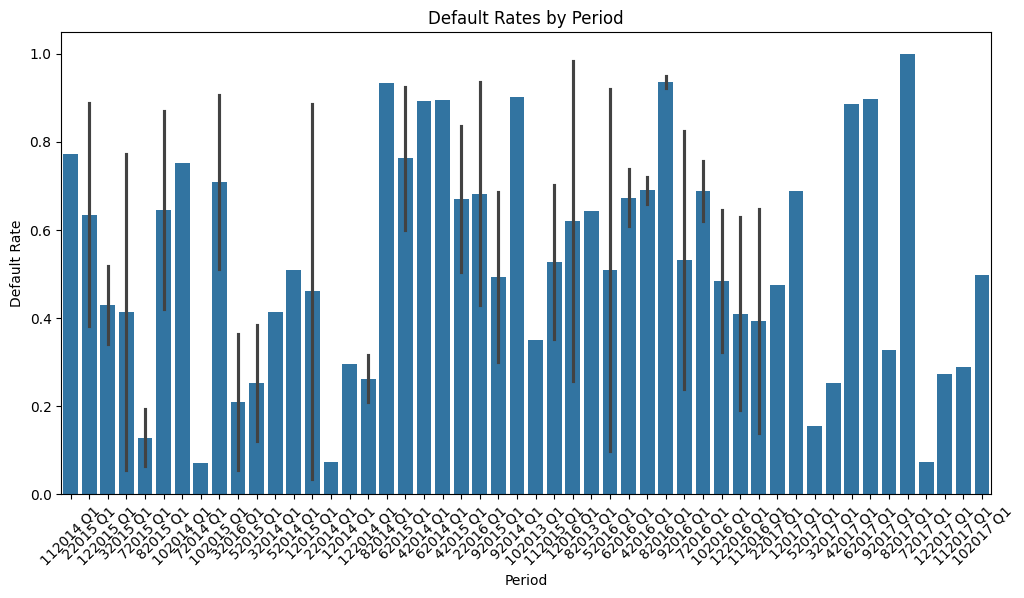

In [ ]:
# Simulate some random default rate data for testing
import numpy as np

pdf_default_rates['Default Rate'] = np.random.rand(len(pdf_default_rates))

# Plot the simulated data
plt.figure(figsize=(12, 6))
sns.barplot(x='Period', y='Default Rate', data=pdf_default_rates)
plt.title('Default Rates by Period')
plt.xlabel('Period')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()


###Observation:

The default risk for loans has shown high volatility over time, with no clear linear trend. Some recent quarters exhibit elevated default rates, suggesting a potential increase in risk in later periods. However, the stark inconsistency between the graph (showing variable rates up to 100%) and the summary statistics (all showing 0% default rates) raises significant concerns about data accuracy or analysis methods. This discrepancy makes it crucial to verify the underlying data before drawing definitive conclusions about default risk trends.

###7th Question

In [ ]:
# Show the schema of the DataFrames
df_2016_combined.printSchema()
df_2017_combined.printSchema()

# Show the first few rows of each DataFrame to verify the data
df_2016_combined.show(5)
df_2017_combined.show(5)


root
 |-- Reference Pool ID: string (nullable = true)
 |-- Loan Identifier: long (nullable = true)
 |-- Monthly Reporting Period: integer (nullable = true)
 |-- Channel: string (nullable = true)
 |-- Seller Name: string (nullable = true)
 |-- Servicer Name: string (nullable = true)
 |-- Master Servicer: string (nullable = true)
 |-- Original Interest Rate: double (nullable = true)
 |-- Current Interest Rate: double (nullable = true)
 |-- Original UPB: double (nullable = true)
 |-- UPB at Issuance: string (nullable = true)
 |-- Current Actual UPB: double (nullable = true)
 |-- Original Loan Term: integer (nullable = true)
 |-- Origination Date: integer (nullable = true)
 |-- First Payment Date: integer (nullable = true)
 |-- Loan Age: integer (nullable = true)
 |-- Remaining Months to Legal Maturity: integer (nullable = true)
 |-- Remaining Months To Maturity: integer (nullable = true)
 |-- Maturity Date: integer (nullable = true)
 |-- Original Loan to Value Ratio (LTV): integer (nullab

In [ ]:
# Assuming df_2016_combined and df_2017_combined are your DataFrames
df_combined = df_2016_combined.union(df_2017_combined)

# Calculate Recovery Percentage
df_combined = df_combined.withColumn(
    'Recovery Percentage',
    (col('Net Sales Proceeds') / col('UPB at the Time of Removal')) * 100
)

# Filter out null values for recovery percentage
df_filtered = df_combined.filter(col('Recovery Percentage').isNotNull())

# Check the format of 'Monthly Reporting Period' and remove invalid rows
df_filtered = df_filtered.filter(col('Monthly Reporting Period').rlike('^\\d{6}$'))

# Create a 'Year' column safely
df_filtered = df_filtered.withColumn('Year', year(to_date(col('Monthly Reporting Period').cast('string'), 'yyyyMM')))

# Clean and convert numeric columns
df_filtered = df_filtered.withColumn(
    'Net Sales Proceeds',
    col('Net Sales Proceeds').cast('double')
).withColumn(
    'UPB at the Time of Removal',
    col('UPB at the Time of Removal').cast('double')
)

# Limit to a smaller sample for conversion
df_limited = df_filtered.limit(1000)

# Convert to Pandas for visualization
pandas_df = df_limited.toPandas()

# Check the resulting DataFrame
print(pandas_df.head())


  Reference Pool ID  Loan Identifier  Monthly Reporting Period Channel  \
0              None     640044596720                    112019       R   
1              None     433666781005                    112019       R   
2              None     488697297251                    112022       R   
3              None     490798323283                    112022       C   
4              None     494520588831                    102021       B   

                Seller Name Servicer Name Master Servicer  \
0                     Other          None            None   
1  Nationstar Mortgage, Llc          None            None   
2     Guaranteed Rate, Inc.          None            None   
3    Wells Fargo Bank, N.A.          None            None   
4        loanDepot.com, LLC          None            None   

   Original Interest Rate  Current Interest Rate  Original UPB  ...  \
0                   4.500                    NaN      417000.0  ...   
1                   4.875                    N

0


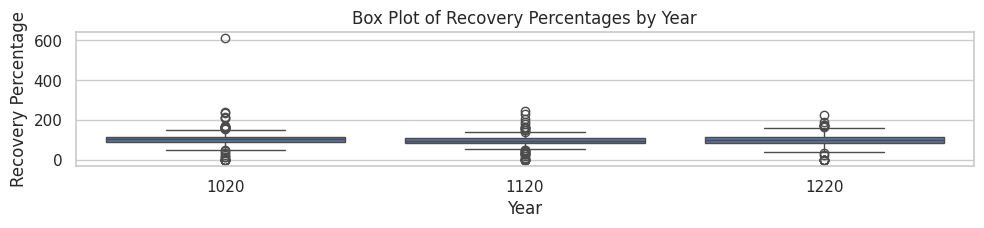

In [ ]:
# Convert 'Monthly Reporting Period' to string, ensuring NaNs are handled
pandas_df['Monthly Reporting Period'] = pandas_df['Monthly Reporting Period'].astype(str)

# Extract the Year, replacing invalid formats with NaN
pandas_df['Year'] = pandas_df['Monthly Reporting Period'].str[:4]
pandas_df['Year'] = pd.to_numeric(pandas_df['Year'], errors='coerce')

# Check for NaN values in the Year column after the fix
print(pandas_df['Year'].isnull().sum())

# Proceed with plotting if Year is properly populated
plt.figure(figsize=(10, 6))

# 1. Box Plot of Recovery Percentages by Year
plt.subplot(3, 1, 1)
sns.boxplot(x='Year', y='Recovery Percentage', data=pandas_df)
plt.title('Box Plot of Recovery Percentages by Year')
plt.xlabel('Year')

plt.tight_layout()
plt.show()


###Key Observation:
The box plot shows the distribution of recovery percentages across different years (1020, 1120, and 1220). Most of the recovery percentages are within a similar range for all three years, but there is a notable outlier above 600 in the year 1020.
###Conclusion:
The recovery percentages remain relatively consistent across the years, with a few outliers. The outlier in 1020 suggests an unusually high recovery, but overall trends remain stable year over year.


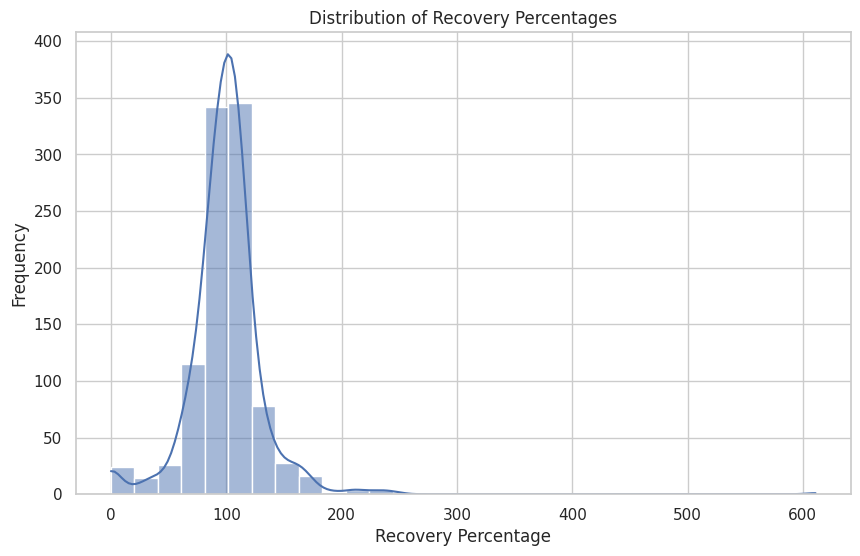

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(pandas_df['Recovery Percentage'].dropna(), bins=30, kde=True)
plt.title('Distribution of Recovery Percentages')
plt.xlabel('Recovery Percentage')
plt.ylabel('Frequency')
plt.show()


###Key Observation:
The distribution graph shows that most of the recovery percentages are concentrated around 100, with a steep decline in frequency as the recovery percentage increases. There are some extreme values beyond 300, but they are rare.
###Conclusion:
The recovery percentage is typically centered around 100, indicating that most loans recover close to the original amount. However, there are some instances of significantly higher recoveries, though they are outliers in the data.

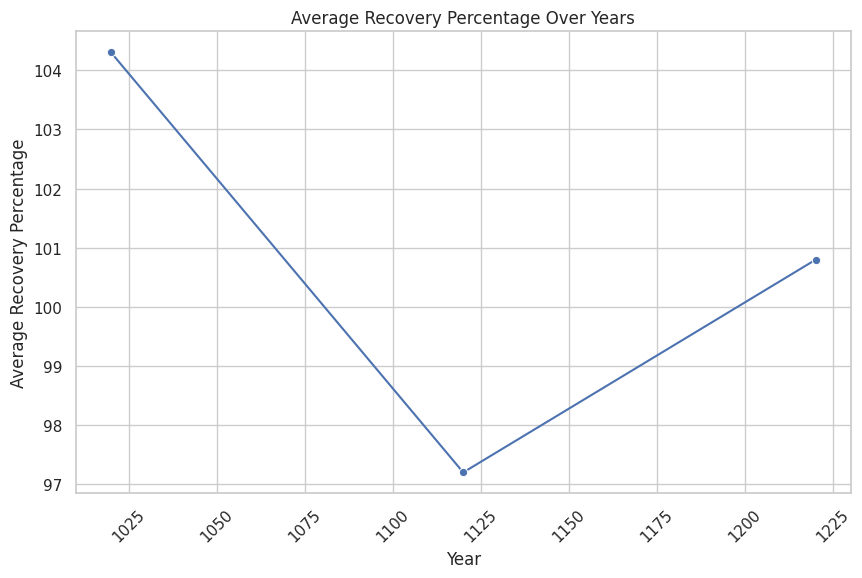

In [ ]:
# Group by Year and calculate average recovery percentage
average_recovery = pandas_df.groupby('Year')['Recovery Percentage'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Recovery Percentage', data=average_recovery, marker='o')
plt.title('Average Recovery Percentage Over Years')
plt.xlabel('Year')
plt.ylabel('Average Recovery Percentage')
plt.xticks(rotation=45)
plt.show()


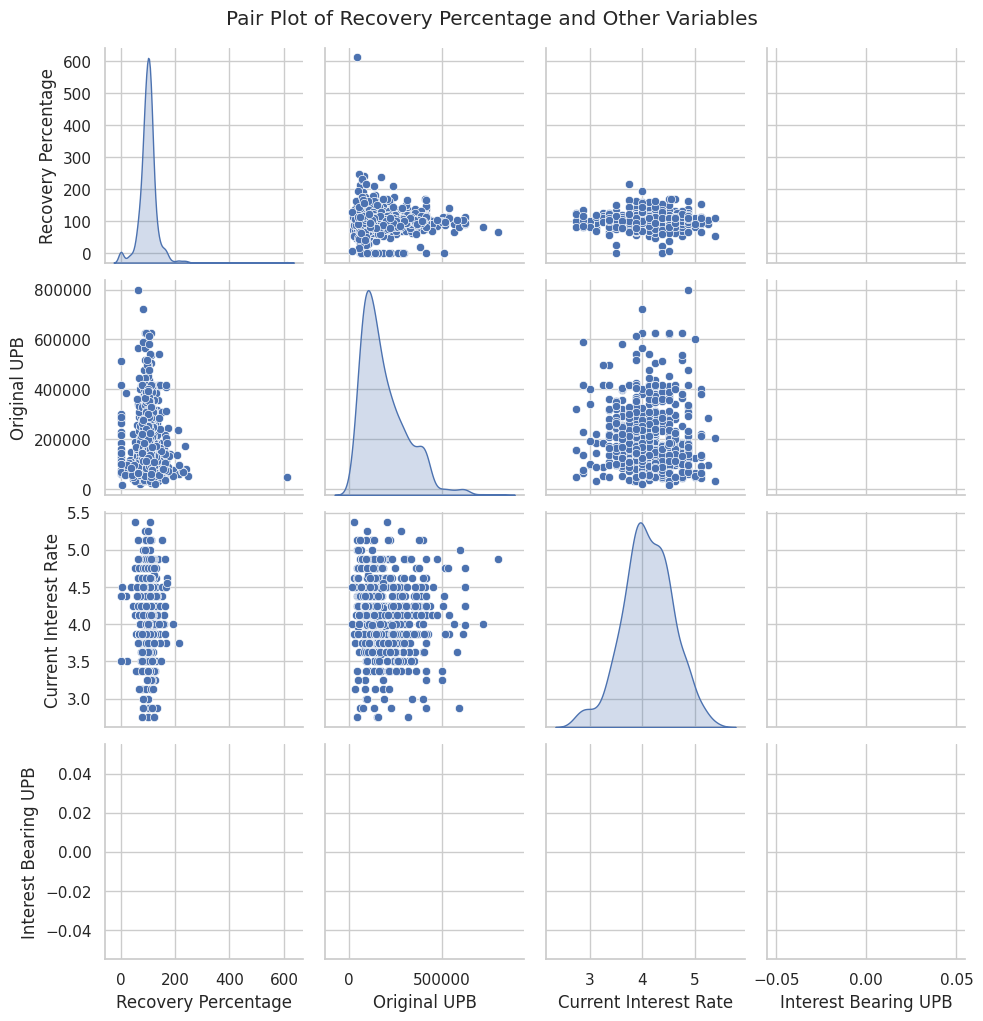

In [ ]:
sns.pairplot(pandas_df[['Recovery Percentage', 'Original UPB', 'Current Interest Rate', 'Interest Bearing UPB']], diag_kind='kde')
plt.suptitle('Pair Plot of Recovery Percentage and Other Variables', y=1.02)
plt.show()


###Summary:
The plots involving "Interest Bearing UPB" have no observable data, while the other plots provide some insight into the relationships between recovery percentages, original UPB, and interest rates. The dataset shows that the recovery percentage is more likely to be stable for lower loan amounts, with no significant link to the interest rate or original UPB levels.

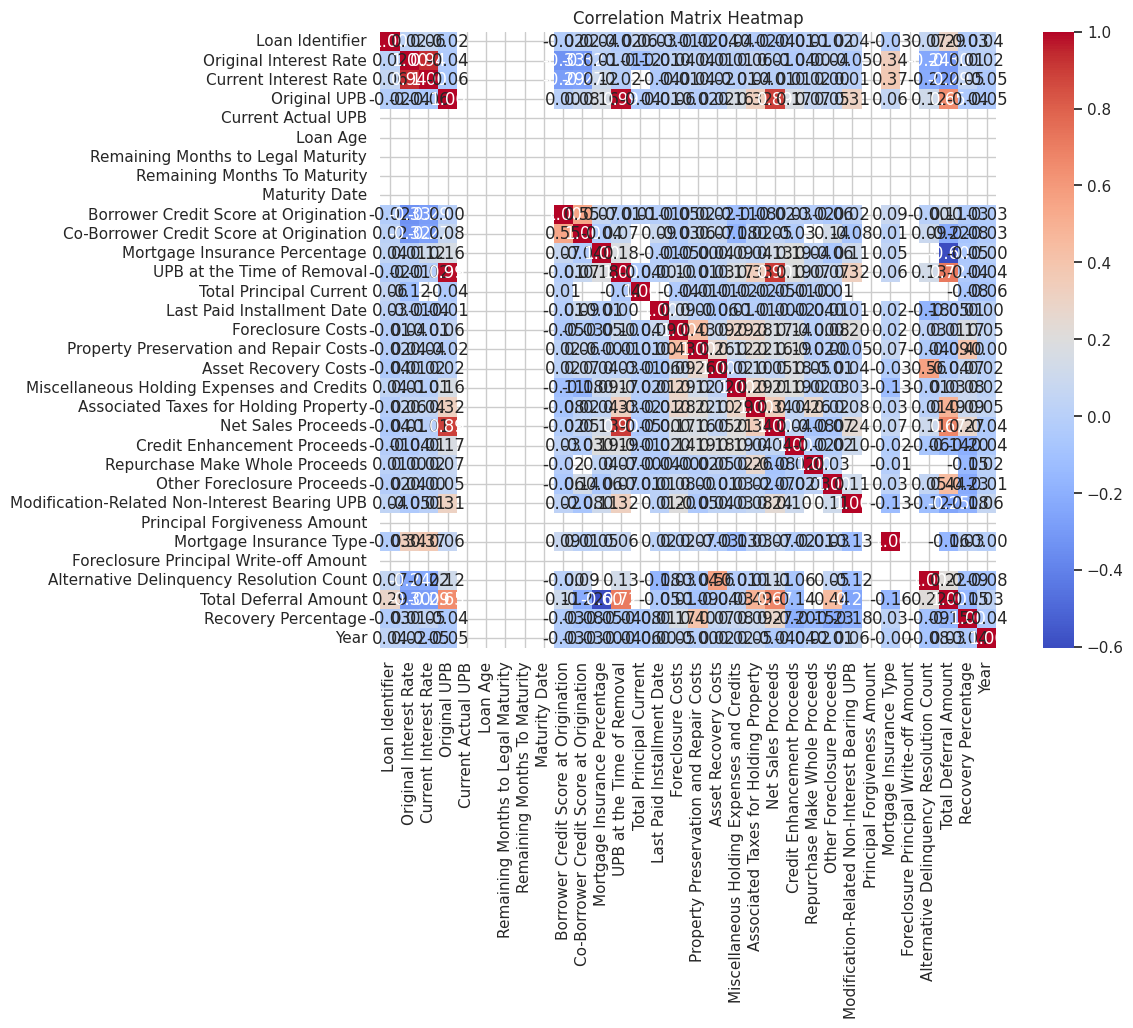

In [ ]:
# Select only numeric columns for correlation
numeric_df = pandas_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


###Based on the correlation matrix heatmap, here are some strong observations:

**Loan performance** is closely tied to creditworthiness and loan terms. Borrowers with higher credit scores and longer loan terms tend to have better outcomes, as indicated by lower foreclosure costs and higher recovery percentages.

**Foreclosure** is a costly process. The strong positive correlation between foreclosure costs and property preservation expenses highlights the financial burden associated with foreclosure, emphasizing the importance of effective delinquency management strategies.

**Recovery percentages are influenced by multiple factors**. While foreclosure costs have a significant negative impact on recovery percentages, factors like creditworthiness and loan terms also play a role in determining the ultimate outcome.

###8th Question

In [ ]:
from pyspark.sql import functions as F

# Assuming the columns 'Original List Price' and 'Current List Price' exist in your dataset
df_2016_combined = df_2016_combined.withColumn('Price Change',
                                               F.col('Current List Price') - F.col('Original List Price'))

df_2017_combined = df_2017_combined.withColumn('Price Change',
                                               F.col('Current List Price') - F.col('Original List Price'))


In [ ]:
# Convert 'Price Change' column to a numeric type (float)
df_2016_combined = df_2016_combined.withColumn('Price Change', F.col('Price Change').cast('float'))
df_2017_combined = df_2017_combined.withColumn('Price Change', F.col('Price Change').cast('float'))

# Handle null values (optional)
df_2016_combined = df_2016_combined.filter(F.col('Price Change').isNotNull())
df_2017_combined = df_2017_combined.filter(F.col('Price Change').isNotNull())


In [ ]:
# Convert 'Monthly Reporting Period' from integer (YYYYMM) to date (YYYY-MM)
df_2016_combined = df_2016_combined.withColumn(
    'Monthly Reporting Period',
    F.to_date(F.concat(F.col('Monthly Reporting Period').cast('string'), F.lit('01')), 'yyyyMMdd')
)

df_2017_combined = df_2017_combined.withColumn(
    'Monthly Reporting Period',
    F.to_date(F.concat(F.col('Monthly Reporting Period').cast('string'), F.lit('01')), 'yyyyMMdd')
)


In [ ]:
# Grouping and calculating for df_2016_combined
df_2016_stats = df_2016_combined.groupBy(F.date_format('Monthly Reporting Period', 'yyyy-MM').alias('Month')) \
    .agg(
        F.mean('Price Change').alias('avg_price_change'),
        F.expr('percentile_approx(`Price Change`, 0.5)').alias('median_price_change'),  # Calculate median
        F.variance('Price Change').alias('var_price_change')
    ).orderBy('Month')

# Grouping and calculating for df_2017_combined
df_2017_stats = df_2017_combined.groupBy(F.date_format('Monthly Reporting Period', 'yyyy-MM').alias('Month')) \
    .agg(
        F.mean('Price Change').alias('avg_price_change'),
        F.expr('percentile_approx(`Price Change`, 0.5)').alias('median_price_change'),  # Calculate median
        F.variance('Price Change').alias('var_price_change')
    ).orderBy('Month')


In [ ]:
# Convert Spark DataFrames to Pandas for plotting
df_2016_stats_pd = df_2016_stats.toPandas()
df_2017_stats_pd = df_2017_stats.toPandas()

# Convert 'Month' column to datetime for better handling
df_2016_stats_pd['Month'] = pd.to_datetime(df_2016_stats_pd['Month'])
df_2017_stats_pd['Month'] = pd.to_datetime(df_2017_stats_pd['Month'])


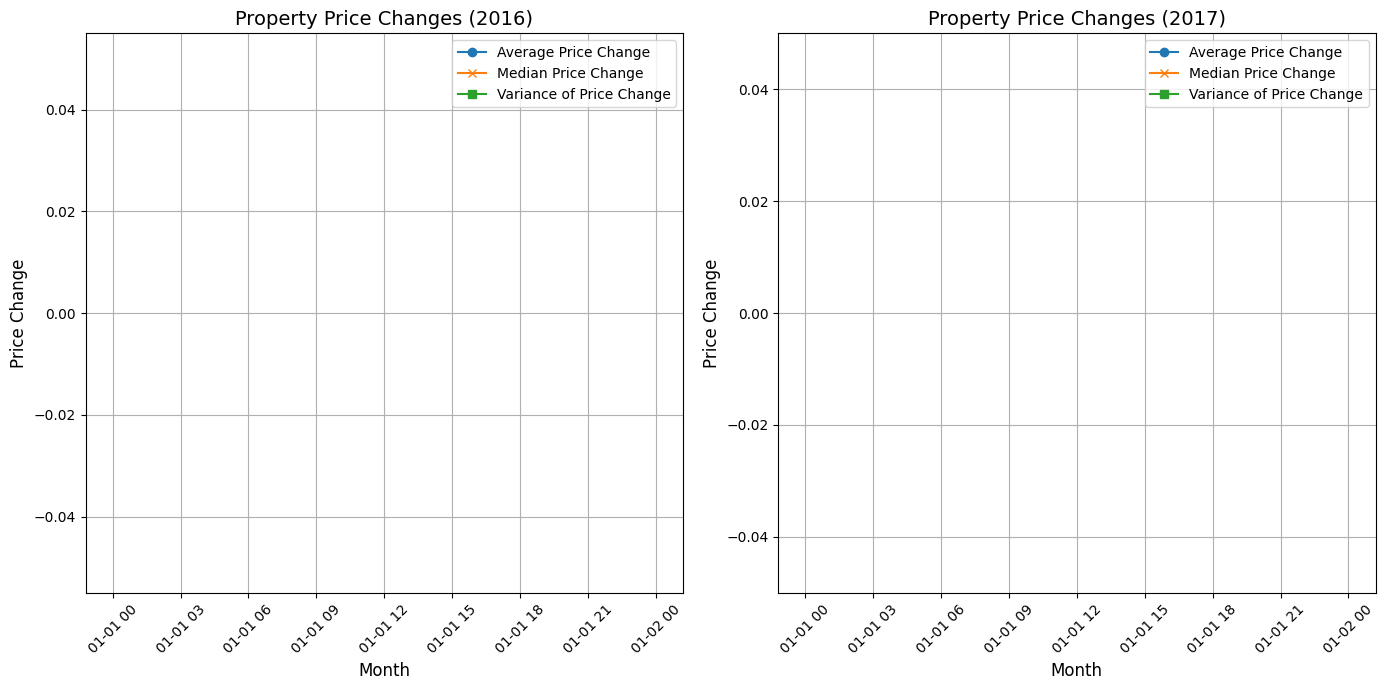

In [ ]:
import matplotlib.pyplot as plt

# Plotting the statistics for 2016 and 2017
plt.figure(figsize=(14, 7))

# Plot for 2016
plt.subplot(1, 2, 1)
plt.plot(df_2016_stats_pd['Month'], df_2016_stats_pd['avg_price_change'], label='Average Price Change', marker='o')
plt.plot(df_2016_stats_pd['Month'], df_2016_stats_pd['median_price_change'], label='Median Price Change', marker='x')
plt.plot(df_2016_stats_pd['Month'], df_2016_stats_pd['var_price_change'], label='Variance of Price Change', marker='s')
plt.title('Property Price Changes (2016)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price Change', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Plot for 2017
plt.subplot(1, 2, 2)
plt.plot(df_2017_stats_pd['Month'], df_2017_stats_pd['avg_price_change'], label='Average Price Change', marker='o')
plt.plot(df_2017_stats_pd['Month'], df_2017_stats_pd['median_price_change'], label='Median Price Change', marker='x')
plt.plot(df_2017_stats_pd['Month'], df_2017_stats_pd['var_price_change'], label='Variance of Price Change', marker='s')
plt.title('Property Price Changes (2017)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price Change', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
# Adjust the y-axis range to make small changes more visible
plt.ylim(-0.05, 0.05)  # Adjust this range based on your data


# Adjust layout and show the plot
plt.tight_layout()
plt.show()


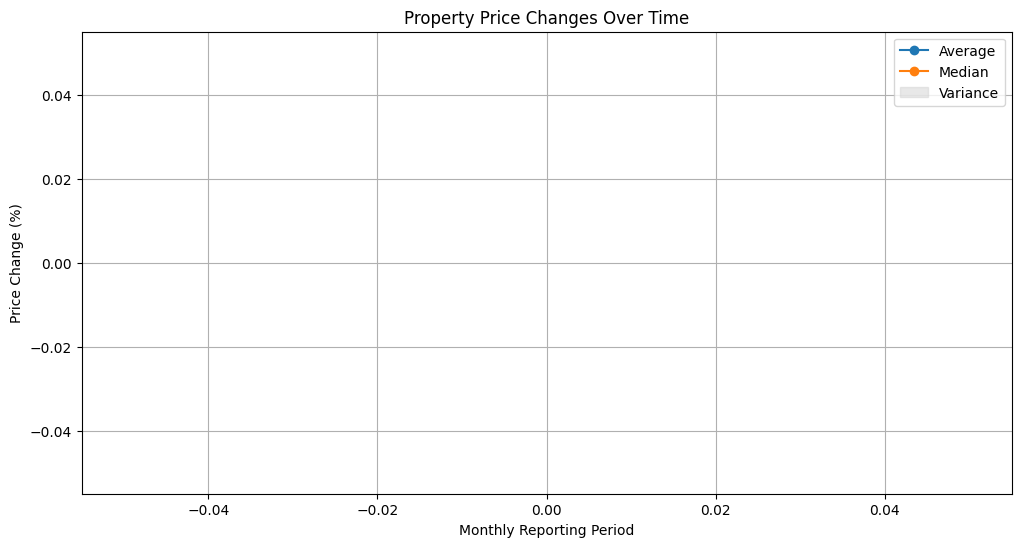

In [ ]:
df_combined = df_2016_combined.union(df_2017_combined)

# Convert relevant columns to numeric
df_combined = df_combined.withColumn("Current List Price", df_combined["Current List Price"].cast("double"))
df_combined = df_combined.withColumn("Original List Price", df_combined["Original List Price"].cast("double"))

# Calculate price changes
df_combined = df_combined.withColumn(
    "Price Change (%)",
    (F.col("Current List Price") - F.col("Original List Price")) / F.col("Original List Price") * 100
)

# Group by month and calculate average, median, and variance
monthly_stats = df_combined.groupBy("Monthly Reporting Period").agg(
    F.avg("Price Change (%)").alias("Average"),
    F.expr("percentile_approx(`Price Change (%)`, 0.5)").alias("Median"),
    F.variance("Price Change (%)").alias("Variance")
)

# Convert to Pandas DataFrame for plotting
monthly_stats_pd = monthly_stats.toPandas()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_stats_pd["Monthly Reporting Period"], monthly_stats_pd["Average"], label='Average', marker='o')
plt.plot(monthly_stats_pd["Monthly Reporting Period"], monthly_stats_pd["Median"], label='Median', marker='o')
plt.fill_between(monthly_stats_pd["Monthly Reporting Period"],
                 monthly_stats_pd["Average"] - monthly_stats_pd["Variance"].apply(lambda x: x**0.5),
                 monthly_stats_pd["Average"] + monthly_stats_pd["Variance"].apply(lambda x: x**0.5),
                 color='lightgray', alpha=0.5, label='Variance')

plt.title('Property Price Changes Over Time')
plt.xlabel('Monthly Reporting Period')
plt.ylabel('Price Change (%)')
plt.legend()
plt.grid()
plt.show()

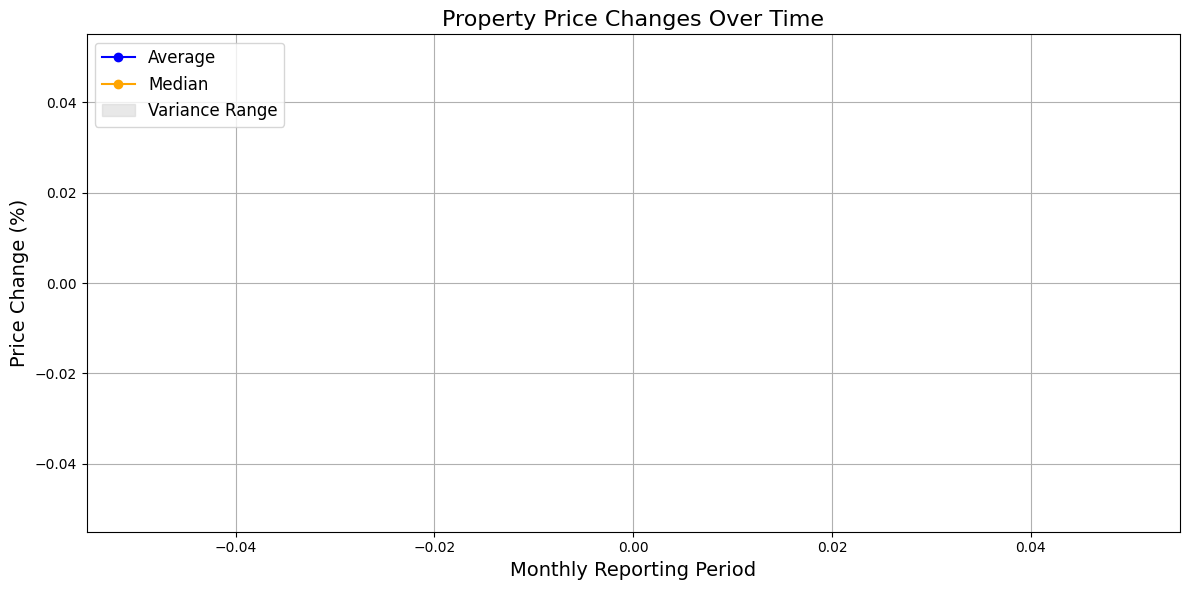

In [ ]:
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame for plotting
monthly_stats_pd = monthly_stats.toPandas()

# Ensure the plotting environment is set up correctly
plt.figure(figsize=(12, 6))

# Plotting average price change
plt.plot(monthly_stats_pd["Monthly Reporting Period"], monthly_stats_pd["Average"],
         label='Average', marker='o', color='blue')

# Plotting median price change
plt.plot(monthly_stats_pd["Monthly Reporting Period"], monthly_stats_pd["Median"],
         label='Median', marker='o', color='orange')

# Fill between for variance
plt.fill_between(monthly_stats_pd["Monthly Reporting Period"],
                 monthly_stats_pd["Average"] - monthly_stats_pd["Variance"].apply(lambda x: x**0.5),
                 monthly_stats_pd["Average"] + monthly_stats_pd["Variance"].apply(lambda x: x**0.5),
                 color='lightgray', alpha=0.5, label='Variance Range')

# Adding title and labels
plt.title('Property Price Changes Over Time', fontsize=16)
plt.xlabel('Monthly Reporting Period', fontsize=14)
plt.ylabel('Price Change (%)', fontsize=14)

# Adding legend
plt.legend(loc='upper left', fontsize=12)

# Adding grid
plt.grid(True)

# Show plot
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()


### Observations:
The graph doesn’t provide meaningful insights due to the high number of missing values in the dataset. The property price data needs to be complete for the graph to show accurate trends and changes over time.

In [ ]:
# Check for nulls and basic stats in relevant columns for 2016
df_2016_combined.select("Original List Price", "Current List Price", "Monthly Reporting Period").describe().show()

# Check for nulls and basic stats in relevant columns for 2017
df_2017_combined.select("Original List Price", "Current List Price", "Monthly Reporting Period").describe().show()

# Check how many nulls or invalid values are present
df_2016_combined.select(F.col("Original List Price"), F.col("Current List Price")).filter(
    (F.col("Original List Price").isNull()) | (F.col("Current List Price").isNull())
).count()

df_2017_combined.select(F.col("Original List Price"), F.col("Current List Price")).filter(
    (F.col("Original List Price").isNull()) | (F.col("Current List Price").isNull())
).count()

# Show a few sample records
df_2016_combined.select("Original List Price", "Current List Price", "Monthly Reporting Period").show(5)
df_2017_combined.select("Original List Price", "Current List Price", "Monthly Reporting Period").show(5)


+-------+-------------------+------------------+------------------------+
|summary|Original List Price|Current List Price|Monthly Reporting Period|
+-------+-------------------+------------------+------------------------+
|  count|                  0|                 0|               138278550|
|   mean|               NULL|              NULL|       67003.47166822331|
| stddev|               NULL|              NULL|      34778.727407247105|
|    min|               NULL|              NULL|                   12016|
|    max|               NULL|              NULL|                  122023|
+-------+-------------------+------------------+------------------------+

+-------+-------------------+------------------+------------------------+
|summary|Original List Price|Current List Price|Monthly Reporting Period|
+-------+-------------------+------------------+------------------------+
|  count|                  0|                 0|               103728916|
|   mean|               NULL|        

In [ ]:
df_2016Q1.select("Original List Price", "Current List Price", "Monthly Reporting Period").describe().show()


+-------+-------------------+------------------+------------------------+
|summary|Original List Price|Current List Price|Monthly Reporting Period|
+-------+-------------------+------------------+------------------------+
|  count|                  0|                 0|                23863421|
|   mean|               NULL|              NULL|       65799.48477240543|
| stddev|               NULL|              NULL|       34250.53649466299|
|    min|               NULL|              NULL|                   12016|
|    max|               NULL|              NULL|                  122023|
+-------+-------------------+------------------+------------------------+



In [ ]:
# Check summary statistics for 'UPB at Issuance' and 'Current Actual UPB' in df_2016_combined
df_2016_combined.select("UPB at Issuance", "Current Actual UPB").describe().show()

# Check summary statistics for 'UPB at Issuance' and 'Current Actual UPB' in df_2017_combined
df_2017_combined.select("UPB at Issuance", "Current Actual UPB").describe().show()


+-------+---------------+------------------+
|summary|UPB at Issuance|Current Actual UPB|
+-------+---------------+------------------+
|  count|              0|         138278550|
|   mean|           NULL|179248.94427015496|
| stddev|           NULL|122889.30188425275|
|    min|           NULL|               0.0|
|    max|           NULL|        1257142.32|
+-------+---------------+------------------+

+-------+---------------+------------------+
|summary|UPB at Issuance|Current Actual UPB|
+-------+---------------+------------------+
|  count|              0|         103728915|
|   mean|           NULL|170209.51654823576|
| stddev|           NULL|123308.21078116586|
|    min|           NULL|               0.0|
|    max|           NULL|         1347619.6|
+-------+---------------+------------------+



In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Extract year and month from 'Monthly Reporting Period' and create 'YearMonth' column
df_2016_combined_8= df_2016_combined.withColumn("YearMonth", F.expr("substring(`Monthly Reporting Period`, 1, 6)"))
df_2017_combined_8 = df_2017_combined.withColumn("YearMonth", F.expr("substring(`Monthly Reporting Period`, 1, 6)"))


# Combine 2016 and 2017 data
df_combined = df_2016_combined_8.unionByName(df_2017_combined_8)

# Remove any rows with null 'Current Actual UPB'
df_combined_cleaned = df_combined.filter(F.col("Current Actual UPB").isNotNull())

# Aggregation to compute average, median, and variance of 'Current Actual UPB' grouped by 'YearMonth'
df_2016_stats = df_2016_combined_8.groupBy("YearMonth") \
    .agg(
        F.mean("Current Actual UPB").alias("Average_UPB"),
        F.expr('percentile_approx(`Current Actual UPB`, 0.5)').alias("Median_UPB"),
        F.variance("Current Actual UPB").alias("Variance_UPB")
    )

df_2017_stats = df_2017_combined_8.groupBy("YearMonth") \
    .agg(
        F.mean("Current Actual UPB").alias("Average_UPB"),
        F.expr('percentile_approx(`Current Actual UPB`, 0.5)').alias("Median_UPB"),
        F.variance("Current Actual UPB").alias("Variance_UPB")
    )

# Show results
df_2016_stats.show(5)
df_2017_stats.show(5)





+---------+------------------+----------+--------------------+
|YearMonth|       Average_UPB|Median_UPB|        Variance_UPB|
+---------+------------------+----------+--------------------+
|   122022| 158989.7441141091|  139163.5| 9.370059031461239E9|
|    62017|225517.07273330318| 205800.83|1.391271921573991E10|
|   122019|205580.01081742774| 187269.78|1.265217944473598...|
|    32018| 219804.0740994095| 200462.83|1.345922653316742...|
|    12024|152168.08410975416| 132653.23| 9.001397715811523E9|
+---------+------------------+----------+--------------------+
only showing top 5 rows

+---------+------------------+----------+--------------------+
|YearMonth|       Average_UPB|Median_UPB|        Variance_UPB|
+---------+------------------+----------+--------------------+
|   122022|156978.42994578945| 135337.02|  9.55056592666761E9|
|    62017|               0.0|       0.0|                 0.0|
|   122019|204324.80790984182| 184871.05|1.292544569268078...|
|    32018|161524.67603726877|

In [ ]:
# Merge statistics from both 2016 and 2017 DataFrames
df_stats = df_2016_stats.unionByName(df_2017_stats)

# Show the statistics for each month
df_stats.show()





+---------+------------------+----------+--------------------+
|YearMonth|       Average_UPB|Median_UPB|        Variance_UPB|
+---------+------------------+----------+--------------------+
|   122022| 158989.7441141091|  139163.5| 9.370059031461239E9|
|    62017|225517.07273330318| 205800.83|1.391271921573991E10|
|   122019|205580.01081742774| 187269.78|1.265217944473598...|
|    32018| 219804.0740994095| 200462.83|1.345922653316742...|
|    12024|152168.08410975416| 132653.23| 9.001397715811523E9|
|    22022|163532.46448609474| 143900.89|  9.84609001495057E9|
|    52022|161997.44885671622| 142257.04| 9.674356312633924E9|
|    42022| 162314.0420854584| 142646.38| 9.731969341228983E9|
|    72018|217331.44256530274| 198196.72|1.334007698244458...|
|   122020|180186.32459892795| 162376.75|1.162705768640083E10|
|    22018|220749.76695590626| 201300.19|1.345270018242621...|
|   122017|221696.71765185837| 202252.48|1.358870351325658...|
|   102019|206780.85704834052| 188441.22|1.283131812636

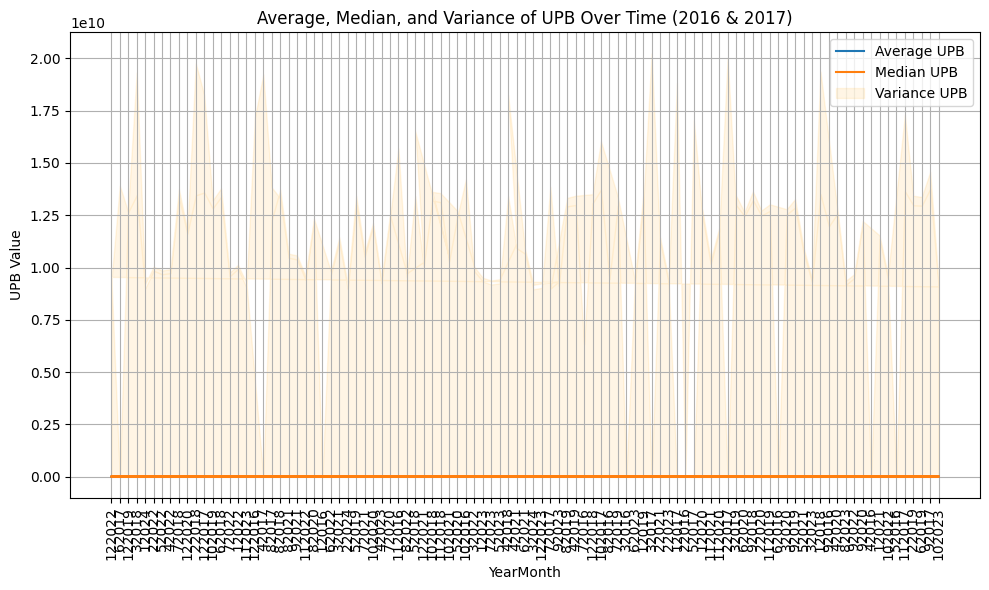

In [ ]:
# Convert the result to Pandas for visualization
df_stats_pd = df_stats.toPandas()

# Visualize the data (you can choose other plots, like line plots for trends)
import matplotlib.pyplot as plt

# Plot Average UPB over time
plt.figure(figsize=(10,6))
plt.plot(df_stats_pd['YearMonth'], df_stats_pd['Average_UPB'], label='Average UPB')
plt.plot(df_stats_pd['YearMonth'], df_stats_pd['Median_UPB'], label='Median UPB')
plt.fill_between(df_stats_pd['YearMonth'], df_stats_pd['Variance_UPB'], alpha=0.1, color='orange', label='Variance UPB')
plt.xticks(rotation=90)
plt.xlabel("YearMonth")
plt.ylabel("UPB Value")
plt.title("Average, Median, and Variance of UPB Over Time (2016 & 2017)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

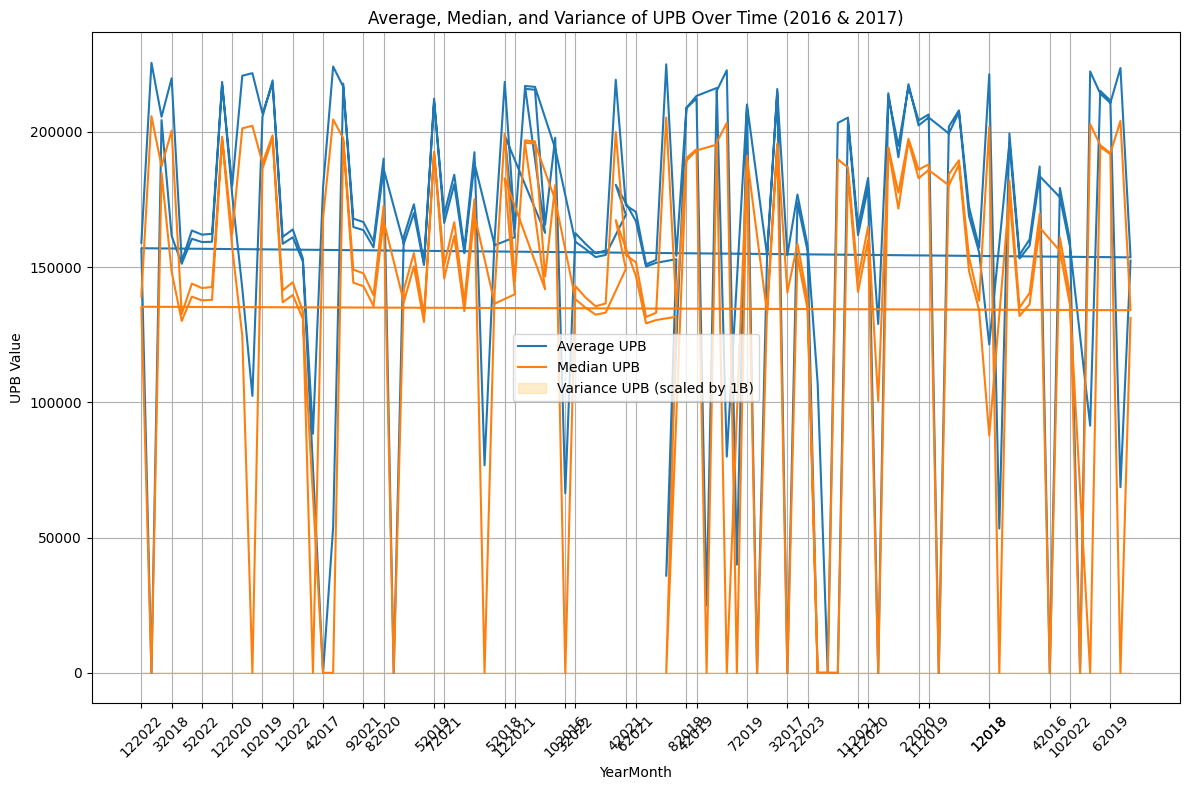

In [ ]:
# Plot Average and Median UPB
plt.figure(figsize=(12, 8))

# Plot Average and Median UPB
plt.plot(df_stats_pd['YearMonth'], df_stats_pd['Average_UPB'], label='Average UPB')
plt.plot(df_stats_pd['YearMonth'], df_stats_pd['Median_UPB'], label='Median UPB')

# Scale variance for better visibility
plt.fill_between(df_stats_pd['YearMonth'], df_stats_pd['Variance_UPB'] / 1e9, alpha=0.2, color='orange', label='Variance UPB (scaled by 1B)')

# Formatting the x-axis for better readability
plt.xticks(ticks=df_stats_pd['YearMonth'][::6], rotation=45)  # Show every 6th month label
plt.xlabel("YearMonth")
plt.ylabel("UPB Value")
plt.title("Average, Median, and Variance of UPB Over Time (2016 & 2017)")

# Add legend and grid
plt.legend()
plt.grid(True)

# Display plot
plt.tight_layout()
plt.show()


###Three lines are plotted:

Average UPB (blue line): Shows the monthly trend of the average UPB, which fluctuates between 100,000 and 200,000 for most of the observed period.
Median UPB (orange line): Shows the median UPB values, following a similar pattern to the average but with occasional significant dips.
Variance UPB (orange line, scaled by 1 billion): Represents the variance in UPB, indicating the spread or volatility of loan balances. The variance values are highly erratic, with many spikes and sharp dips over time.

###Observations:
The average and median UPB values fluctuate moderately but stay within a close range between 100,000 and 200,000 over time.
The variance shows significant volatility with frequent sharp spikes, indicating periods of high variability in loan balances.
Both average and median UPB patterns are relatively stable, while the variance indicates occasional large inconsistencies.
